In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import deque, Counter
import re

kaggle_2021 = pd.read_csv("./data/kaggle_survey_collection/kaggle_survey_2021/kaggle_survey_2021_responses.csv", low_memory=False)

In [2]:
# pd.set_option('display.max_colwidth', 999)
# list(kaggle_2021.loc[0])

kaggle_2020 = pd.read_csv("./data/kaggle_survey_collection/kaggle_survey_2020/kaggle_survey_2020_responses.csv", low_memory=False)

kaggle_2019_questions = pd.read_csv("./data/kaggle_survey_collection/kaggle_survey_2019/questions_only.csv", low_memory=False)

kaggle_2019_responses = pd.read_csv("./data/kaggle_survey_collection/kaggle_survey_2019/multiple_choice_responses.csv", low_memory=False)

kaggle_2018 = pd.read_csv("./data/kaggle_survey_collection/kaggle_survey_2018/multipleChoiceResponses.csv", low_memory=False)

kaggle_2017_multi_choice = pd.read_csv("./data/kaggle_survey_collection/kaggle_survey_2017/multipleChoiceResponses.csv", low_memory=False, encoding='latin')

kaggle_2017_free_form = pd.read_csv("./data/kaggle_survey_collection/kaggle_survey_2017/freeformResponses.csv", low_memory=False, encoding='latin')

Kaggle survey datasets do not seem fit - no salary information

In [3]:
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [4]:
pd.set_option('display.max_colwidth', 100)

In [5]:
glassdoor_data_analysts = pd.read_csv("./data/picklesueat_data_science_collection_2020/DataAnalyst.csv")

In [6]:
glassdoor_data_analysts

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,"Data Analyst, Center on Immigration and Justice (CIJ)",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harness data to drive policy change? Do you enjoy sift...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical support for the integration of multiple data sourc...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,"Senior Data Analyst, Insights & Analytics Team [Customer Operations]",$37K-$66K (Glassdoor est.),"We’re looking for a Senior Data Analyst who has a love of mentorship, data visualization, and ge...",3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe collaborate. We create. We innovate.\n\nIntrigued?\...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a world-class team of brands and products all built with...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5626,Data Analyst (Power BI + SAP),$51K-$93K (Glassdoor est.),"KORE1, a nationwide provider of staffing and recruiting solutions, has an immediate opening for ...",4.9,KORE1 Technologies\n4.9,"San Jose, CA","Irvine, CA",51 to 200 employees,2005,Company - Private,Staffing & Outsourcing,Business Services,$10 to $25 million (USD),"CyberCoders, Kforce, ASGN Incorporated",-1
5627,Technical Business or Data Analyst,$46K-$72K (Glassdoor est.),Job Description\nHi\n\nHope you are doing great\nPlease go through the below JD and let me know ...,4.4,Adwait Algorithm\n4.4,"Santa Clara, CA","Houston, TX",51 to 200 employees,2015,Company - Private,IT Services,Information Technology,Unknown / Non-Applicable,-1,-1
5628,Data Analyst Junior,$44K-$82K (Glassdoor est.),"Job Description\nJob description\nInterpret data, analyze results using statistical techniques a...",5.0,"Staffigo Technical Services, LLC\n5.0","Fremont, CA","Woodridge, IL",51 to 200 employees,2008,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
5629,Sr. HR Data Analyst,$44K-$82K (Glassdoor est.),POSITION SUMMARY:\n\nThe Sr. HR Data Analyst position will lead analytical initiatives as well a...,3.5,Cepheid\n3.5,"Sunnyvale, CA","Sunnyvale, CA",1001 to 5000 employees,1996,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$500 million to $1 billion (USD),-1,-1


In [7]:
glassdoor_biz_analysts = pd.read_csv("./data/picklesueat_data_science_collection_2020/BusinessAnalyst.csv")

In [8]:
glassdoor_biz_analysts

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Business Analyst - Clinical & Logistics Platform,$56K-$102K (Glassdoor est.),"Company Overview\n\n\nAt Memorial Sloan Kettering (MSK), we’re not only changing the way we trea...",3.9,Memorial Sloan-Kettering\n3.9,"New York, NY","New York, NY",10000+ employees,1884,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),"Mayo Clinic, The Johns Hopkins Hospital, MD Anderson Cancer Center",-1
1,1,1,Business Analyst,$56K-$102K (Glassdoor est.),We are seeking for an energetic and collaborative analyst with experience and passion to fill ou...,3.8,Paine Schwartz Partners\n3.8,"New York, NY","New York, NY",1 to 50 employees,-1,Company - Private,Venture Capital & Private Equity,Finance,Unknown / Non-Applicable,-1,True
2,2,2,Data Analyst,$56K-$102K (Glassdoor est.),"For more than a decade, Asembia has been working with specialty pharmacies, manufacturers, presc...",3.6,Asembia\n3.6,"Florham Park, NJ","Florham Park, NJ",501 to 1000 employees,2004,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$5 to $10 million (USD),-1,-1
3,3,3,"Information Security Analyst, Incident Response",$56K-$102K (Glassdoor est.),Job Description Summary\nThe Information Security Analyst will be a member of the BD Security Op...,3.6,BD\n3.6,"Franklin Lakes, NJ","Franklin Lakes, NJ",10000+ employees,1897,Company - Public,Health Care Products Manufacturing,Manufacturing,$10+ billion (USD),"Abbott, Siemens, Baxter",-1
4,4,4,Analyst - FP&A Global Revenue,$56K-$102K (Glassdoor est.),Magnite is the world's largest independent sell-side platform. We were built by combining Rubico...,3.4,Rubicon Project\n3.4,"New York, NY","Los Angeles, CA",201 to 500 employees,2007,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"PubMatic, AppNexus, Index Exchange",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4087,Help Desk Analyst,$66K-$114K (Glassdoor est.),Ref ID: 01120-0011488945Classification: Help Desk Analyst II\n\nCompensation: DOE\n\nRobert Half...,3.5,Robert Half\n3.5,"Jacksonville, FL","Menlo Park, CA",10000+ employees,1948,Company - Public,Staffing & Outsourcing,Business Services,$2 to $5 billion (USD),"Adecco, Manpower",-1,NaN,NaN
4088,System Analyst (Data) - PL/SQl Server,$66K-$114K (Glassdoor est.),"Job Title: System Analyst (Data) - PL/SQl Server\nLocation: Jacksonville, FL\nDuration: Full-tim...",3.9,Diverse Lynx\n3.9,"Jacksonville, FL","Princeton, NJ",501 to 1000 employees,2002,Company - Private,IT Services,Information Technology,$100 to $500 million (USD),-1,-1,NaN,NaN
4089,Programmer Analyst- PeopleSoft ( Finance and Supply Chain Management ),$66K-$114K (Glassdoor est.),Job Opening Summary\nReports to the Systems Application Manager. The Programmer Analyst analyzes...,4.0,Shands at the University of Florida\n4.0,"Jacksonville, FL","Gainesville, FL",10000+ employees,-1,Subsidiary or Business Segment,Health Care Services & Hospitals,Health Care,$1 to $2 billion (USD),"Mount Sinai Medical Center of Florida, Baptist Health (Florida), North Florida Regional Medical ...",-1,NaN,NaN
4090,Loss Mitigation Analyst,$66K-$114K (Glassdoor est.),Job Description\nA knowledgeable job-seeker is needed for a Direct-Hire Loss Mitigation Quality ...,4.4,Contemporary Staffing Solutions\n4.4,"Jacksonville, FL","Mount Laurel, NJ",1001 to 5000 employees,1994,Company - Private,Staffing & Outsourcing,Business Services,$100 to $500 million (USD),"PathFinder Staffing, Juno Search Partners, Robert Half",-1,NaN,NaN


In [9]:
glassdoor_biz_analysts["Salary Estimate"].tail(450)
glassdoor_biz_analysts[glassdoor_biz_analysts["Unnamed: 0"].apply(lambda x: not x.isnumeric())]

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
3692,Business Analyst - Loan IQ Specialist,$50K-$78K (Glassdoor est.),Business Analyst - Loan IQ Specialist\n\n\nJacksonville\n\nApply now\n\nRefer someone\n\nWe're l...,3.3,Macquarie Group\n3.3,"Jacksonville, FL","Sydney, Australia",10000+ employees,1969,Company - Public,Investment Banking & Asset Management,Finance,$5 to $10 billion (USD),"Goldman Sachs, Commonwealth Bank of Australia, Deutsche Bank",-1,NaN,NaN
3693,Procure to Pay Analyst,$50K-$78K (Glassdoor est.),Job Summary\n\nWorks daily to resolve complex and escalated requests and discrepancies in Procur...,2.3,CSX\n2.3,"Jacksonville, FL","Jacksonville, FL",10000+ employees,1978,Company - Public,Transportation Management,Transportation & Logistics,$10+ billion (USD),"Union Pacific, BNSF Railway",-1,NaN,NaN
3694,Payroll Analyst,$50K-$78K (Glassdoor est.),Job Summary\nSupports the Train and Engine (T&E) Payroll team within the CSX Payroll Department....,2.3,CSX\n2.3,"Jacksonville, FL","Jacksonville, FL",10000+ employees,1978,Company - Public,Transportation Management,Transportation & Logistics,$10+ billion (USD),"Union Pacific, BNSF Railway",-1,NaN,NaN
3695,Software Quality Assurance Analyst,$50K-$78K (Glassdoor est.),SUMMARY\n\nThe Software Quality Assurance (SQA) Analyst drives the end-to-end product testing st...,3.9,AdTheorent\n3.9,"Jacksonville, FL","New York, NY",201 to 500 employees,2011,Company - Private,Advertising & Marketing,Business Services,$100 to $500 million (USD),-1,-1,NaN,NaN
3696,Senior Support Analyst,$50K-$78K (Glassdoor est.),Vacancy Name Senior Support Analyst\nVacancy Reference VN480\nLocation Country United States\nLo...,3.2,SmartStream Technologies\n3.2,"Jacksonville, FL","London, United Kingdom",501 to 1000 employees,2000,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),-1,-1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4087,Help Desk Analyst,$66K-$114K (Glassdoor est.),Ref ID: 01120-0011488945Classification: Help Desk Analyst II\n\nCompensation: DOE\n\nRobert Half...,3.5,Robert Half\n3.5,"Jacksonville, FL","Menlo Park, CA",10000+ employees,1948,Company - Public,Staffing & Outsourcing,Business Services,$2 to $5 billion (USD),"Adecco, Manpower",-1,NaN,NaN
4088,System Analyst (Data) - PL/SQl Server,$66K-$114K (Glassdoor est.),"Job Title: System Analyst (Data) - PL/SQl Server\nLocation: Jacksonville, FL\nDuration: Full-tim...",3.9,Diverse Lynx\n3.9,"Jacksonville, FL","Princeton, NJ",501 to 1000 employees,2002,Company - Private,IT Services,Information Technology,$100 to $500 million (USD),-1,-1,NaN,NaN
4089,Programmer Analyst- PeopleSoft ( Finance and Supply Chain Management ),$66K-$114K (Glassdoor est.),Job Opening Summary\nReports to the Systems Application Manager. The Programmer Analyst analyzes...,4.0,Shands at the University of Florida\n4.0,"Jacksonville, FL","Gainesville, FL",10000+ employees,-1,Subsidiary or Business Segment,Health Care Services & Hospitals,Health Care,$1 to $2 billion (USD),"Mount Sinai Medical Center of Florida, Baptist Health (Florida), North Florida Regional Medical ...",-1,NaN,NaN
4090,Loss Mitigation Analyst,$66K-$114K (Glassdoor est.),Job Description\nA knowledgeable job-seeker is needed for a Direct-Hire Loss Mitigation Quality ...,4.4,Contemporary Staffing Solutions\n4.4,"Jacksonville, FL","Mount Laurel, NJ",1001 to 5000 employees,1994,Company - Private,Staffing & Outsourcing,Business Services,$100 to $500 million (USD),"PathFinder Staffing, Juno Search Partners, Robert Half",-1,NaN,NaN


**Business analyst data seems to need a touch of cleaning**

In [10]:
biz1, biz2 = glassdoor_biz_analysts[:3692], glassdoor_biz_analysts[3692:]

In [11]:
biz1.tail(5)

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
3687,3687,4395,Pega Business Analyst,$58K-$103K (Glassdoor est.),• 5 yrs relevant experience in:- Experience with Pega RPA or any Robotics Platform or Product\nI...,3.1,Tista Science and Technology Corporation\n3.1,"Austin, TX","Rockville, MD",501 to 1000 employees,2005,Company - Private,Consulting,Business Services,$5 to $10 million (USD),-1,-1
3688,3688,4396,Jr.Business Analyst,$58K-$103K (Glassdoor est.),Job Description\n\nNew businesses are making their way into the market rapidly and this in turn ...,5.0,"Staffigo Technical Services, LLC\n5.0","Austin, TX","Woodridge, IL",51 to 200 employees,2008,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
3689,3689,4397,Business Process Analyst/Remote 4 mth+ contract,$58K-$103K (Glassdoor est.),"Title: Business Process Analyst\nDuration: 4+ Months (Remote)\nLocation: Austin, TX\n\nDescripti...",-1.0,"Suncap Technology, Inc.","Austin, TX",-1,-1,-1,-1,-1,-1,-1,-1,-1
3690,3690,4398,"AVP, Business System",$58K-$103K (Glassdoor est.),"We are looking for a AVP Business System Analyst with experience in analyzing business systems, ...",3.5,LPL Financial\n3.5,"Austin, TX","Boston, MA",1001 to 5000 employees,1968,Company - Public,Investment Banking & Asset Management,Finance,$2 to $5 billion (USD),"Fidelity Investments, UBS, Morgan Stanley",-1
3691,3691,4399,DPS - LS - Cyber Risk & Vulnerability Analyst,$58K-$103K (Glassdoor est.),DPS - LS - Cyber Risk & Vulnerability Analyst (00010924)\nOrganization\n: TEXAS DEPARTMENT OF PU...,3.4,TEXAS DEPARTMENT OF PUBLIC SAFETY\n3.4,"Austin, TX","Austin, TX",1001 to 5000 employees,-1,Government,Municipal Governments,Government,Unknown / Non-Applicable,-1,-1


In [12]:
biz2.head(5)

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
3692,Business Analyst - Loan IQ Specialist,$50K-$78K (Glassdoor est.),Business Analyst - Loan IQ Specialist\n\n\nJacksonville\n\nApply now\n\nRefer someone\n\nWe're l...,3.3,Macquarie Group\n3.3,"Jacksonville, FL","Sydney, Australia",10000+ employees,1969,Company - Public,Investment Banking & Asset Management,Finance,$5 to $10 billion (USD),"Goldman Sachs, Commonwealth Bank of Australia, Deutsche Bank",-1,NaN,NaN
3693,Procure to Pay Analyst,$50K-$78K (Glassdoor est.),Job Summary\n\nWorks daily to resolve complex and escalated requests and discrepancies in Procur...,2.3,CSX\n2.3,"Jacksonville, FL","Jacksonville, FL",10000+ employees,1978,Company - Public,Transportation Management,Transportation & Logistics,$10+ billion (USD),"Union Pacific, BNSF Railway",-1,NaN,NaN
3694,Payroll Analyst,$50K-$78K (Glassdoor est.),Job Summary\nSupports the Train and Engine (T&E) Payroll team within the CSX Payroll Department....,2.3,CSX\n2.3,"Jacksonville, FL","Jacksonville, FL",10000+ employees,1978,Company - Public,Transportation Management,Transportation & Logistics,$10+ billion (USD),"Union Pacific, BNSF Railway",-1,NaN,NaN
3695,Software Quality Assurance Analyst,$50K-$78K (Glassdoor est.),SUMMARY\n\nThe Software Quality Assurance (SQA) Analyst drives the end-to-end product testing st...,3.9,AdTheorent\n3.9,"Jacksonville, FL","New York, NY",201 to 500 employees,2011,Company - Private,Advertising & Marketing,Business Services,$100 to $500 million (USD),-1,-1,NaN,NaN
3696,Senior Support Analyst,$50K-$78K (Glassdoor est.),Vacancy Name Senior Support Analyst\nVacancy Reference VN480\nLocation Country United States\nLo...,3.2,SmartStream Technologies\n3.2,"Jacksonville, FL","London, United Kingdom",501 to 1000 employees,2000,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),-1,-1,NaN,NaN


In [13]:
biz1 = biz1.drop(columns=["Unnamed: 0", "index"])

In [14]:
biz2 = biz2.drop(columns=["Competitors", "Easy Apply"])

In [15]:
biz2.columns = biz1.columns

In [16]:
glassdoor_biz_analysts = pd.concat([biz1, biz2])

In [17]:
glassdoor_biz_analysts.loc[3690:3694]

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
3690,"AVP, Business System",$58K-$103K (Glassdoor est.),"We are looking for a AVP Business System Analyst with experience in analyzing business systems, ...",3.5,LPL Financial\n3.5,"Austin, TX","Boston, MA",1001 to 5000 employees,1968,Company - Public,Investment Banking & Asset Management,Finance,$2 to $5 billion (USD),"Fidelity Investments, UBS, Morgan Stanley",-1
3691,DPS - LS - Cyber Risk & Vulnerability Analyst,$58K-$103K (Glassdoor est.),DPS - LS - Cyber Risk & Vulnerability Analyst (00010924)\nOrganization\n: TEXAS DEPARTMENT OF PU...,3.4,TEXAS DEPARTMENT OF PUBLIC SAFETY\n3.4,"Austin, TX","Austin, TX",1001 to 5000 employees,-1,Government,Municipal Governments,Government,Unknown / Non-Applicable,-1,-1
3692,Business Analyst - Loan IQ Specialist,$50K-$78K (Glassdoor est.),Business Analyst - Loan IQ Specialist\n\n\nJacksonville\n\nApply now\n\nRefer someone\n\nWe're l...,3.3,Macquarie Group\n3.3,"Jacksonville, FL","Sydney, Australia",10000+ employees,1969,Company - Public,Investment Banking & Asset Management,Finance,$5 to $10 billion (USD),"Goldman Sachs, Commonwealth Bank of Australia, Deutsche Bank",-1
3693,Procure to Pay Analyst,$50K-$78K (Glassdoor est.),Job Summary\n\nWorks daily to resolve complex and escalated requests and discrepancies in Procur...,2.3,CSX\n2.3,"Jacksonville, FL","Jacksonville, FL",10000+ employees,1978,Company - Public,Transportation Management,Transportation & Logistics,$10+ billion (USD),"Union Pacific, BNSF Railway",-1
3694,Payroll Analyst,$50K-$78K (Glassdoor est.),Job Summary\nSupports the Train and Engine (T&E) Payroll team within the CSX Payroll Department....,2.3,CSX\n2.3,"Jacksonville, FL","Jacksonville, FL",10000+ employees,1978,Company - Public,Transportation Management,Transportation & Logistics,$10+ billion (USD),"Union Pacific, BNSF Railway",-1


**Business dataset seems to be fixed now**

In [18]:
glassdoor_engineers = pd.read_csv("./data/picklesueat_data_science_collection_2020/DataEngineer.csv")

In [19]:
glassdoor_engineers

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,Data Engineer,$80K-$150K (Glassdoor est.),Company Description\nSagence is a management advisory firm dedicated to helping our clients opti...,4.5,Sagence\n4.5,"New York, NY","Chicago, IL",1 to 50 employees,2009,Company - Private,Consulting,Business Services,$10 to $25 million (USD),"WCI Consulting, PwC",-1
1,Senior Data Engineer (Healthcare Domain experience required),$80K-$150K (Glassdoor est.),"Key Responsibilities\n\n- Architect, build, and maintain efficient data pipelines, utilizing a v...",3.4,Enterprise Integration\n3.4,"New York, NY","Jacksonville, FL",51 to 200 employees,1998,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),-1,-1
2,Data Engineers,$80K-$150K (Glassdoor est.),Overview\n\nJob description\n\nPosition Overview:\n\nSeeking a highly qualified Data Engineer wi...,5.0,Maestro Technologies\n5.0,"New York, NY","Trenton, NJ",51 to 200 employees,2003,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),-1,-1
3,Client Trade Support Engineer,$80K-$150K (Glassdoor est.),"About the Position\n\n\nThis position will support Jane Street’s client-facing trading business,...",4.8,Jane Street\n4.8,"New York, NY","New York, NY",501 to 1000 employees,2000,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1
4,Data Engineer,$80K-$150K (Glassdoor est.),Data Engineer\n\nJob Details\nLevel\nExperienced\nJob Location\nNew York (Home Office) - New Yor...,3.7,GNY Insurance Companies\n3.7,"New York, NY","New York, NY",201 to 500 employees,1914,Company - Private,Insurance Carriers,Insurance,$100 to $500 million (USD),"Travelers, Chubb, Crum & Forster",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2523,Cloud Engineer,$76K-$128K (Glassdoor est.),"The Expertise You Have Proven expertise in developing applications using Spring, Spark and AWS t...",4.5,PMG Global\n4.5,"Westlake, TX","Herndon, VA",1 to 50 employees,-1,Company - Private,Computer Hardware & Software,Information Technology,$1 to $5 million (USD),-1,-1
2524,Electrical Engineer,$76K-$128K (Glassdoor est.),Lockheed Martin is seeking a Circuit and FPGA Design Electrical Engineer with experience in PCB ...,2.9,Albin Engineering Services\n2.9,"Fort Worth, TX","Santa Clara, CA",51 to 200 employees,1993,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),-1,-1
2525,Sr. Big Data Engineer,$76K-$128K (Glassdoor est.),"Posting Title Principal Data Engineer (Contractor) Job Locations Irving, TX ( remote flexibility...",3.7,Cincinnati Bell Technology Solutions\n3.7,"Irving, TX","Cincinnati, OH",501 to 1000 employees,-1,Company - Private,IT Services,Information Technology,$100 to $500 million (USD),-1,-1
2526,Senior Big Data / ETL Engineer,$76K-$128K (Glassdoor est.),"Your Opportunity\n\nCharles Schwab & Co., Inc is currently seeking a seasoned ETL Lead with a pa...",3.5,Schwab\n3.5,"Westlake, TX","Dettenheim, Germany",Unknown,-1,Company - Public,-1,-1,Unknown / Non-Applicable,-1,-1


In [20]:
glassdoor_scientists = pd.read_csv("./data/picklesueat_data_science_collection_2020/DataScientist.csv")

In [21]:
glassdoor_scientists

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission to make booking travel faster, easier, and more tr...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods to help our users create healthier lifestyles, and...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,2,2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData Science Manager : Job Description\n\nWe’re hiring ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
3,3,3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mid-level Data Analyst/QA to join our growing New Je...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,4,4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription\nEdelman Intelligence is seeking a Director-level...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3904,3904,4375,AWS Data Engineer,$55K-$112K (Glassdoor est.),About Us\n\nTachyon Technologies is a Digital Transformation consulting firm that partners with ...,4.4,Tachyon Technologies\n4.4,"Dublin, OH","Irving, TX",201 to 500 employees,2011,Company - Private,IT Services,Information Technology,$10 to $25 million (USD),-1,-1
3905,3905,4376,Data Analyst â Junior,$55K-$112K (Glassdoor est.),"Job description\nInterpret data, analyze results using statistical techniques and provide ongoin...",5.0,"Staffigo Technical Services, LLC\n5.0","Columbus, OH","Woodridge, IL",51 to 200 employees,2008,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
3906,3906,4377,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),Job DescriptionThe Security Analytics Data Engineer will interface with security Big Data enviro...,3.8,"PDS Tech, Inc.\n3.8","Dublin, OH","Irving, TX",5001 to 10000 employees,1977,Company - Private,Staffing & Outsourcing,Business Services,$100 to $500 million (USD),-1,-1
3907,3907,4378,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),"The Security Analytics Data Engineer will interface with security Big Data environments, aiding ...",4.0,Data Resource Technologies\n4.0,"Dublin, OH","Omaha, NE",1 to 50 employees,-1,Company - Private,Accounting,Accounting & Legal,Less than $1 million (USD),-1,-1


Scientists set seem to have similar problem. We can fix this as well. We must check if the error is "clean" though:

In [22]:
glassdoor_scientists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3909 entries, 0 to 3908
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3909 non-null   int64  
 1   index              3909 non-null   int64  
 2   Job Title          3909 non-null   object 
 3   Salary Estimate    3909 non-null   object 
 4   Job Description    3909 non-null   object 
 5   Rating             3909 non-null   float64
 6   Company Name       3909 non-null   object 
 7   Location           3909 non-null   object 
 8   Headquarters       3909 non-null   object 
 9   Size               3909 non-null   object 
 10  Founded            3909 non-null   int64  
 11  Type of ownership  3909 non-null   object 
 12  Industry           3909 non-null   object 
 13  Sector             3909 non-null   object 
 14  Revenue            3909 non-null   object 
 15  Competitors        3909 non-null   object 
 16  Easy Apply         3909 

first two columns are integer type, so no data there, we can drop them

In [23]:
glassdoor_scientists = glassdoor_scientists.drop(columns=['Unnamed: 0', 'index'])

In [24]:
glassdoor_scientists

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission to make booking travel faster, easier, and more tr...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods to help our users create healthier lifestyles, and...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData Science Manager : Job Description\n\nWe’re hiring ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mid-level Data Analyst/QA to join our growing New Je...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription\nEdelman Intelligence is seeking a Director-level...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3904,AWS Data Engineer,$55K-$112K (Glassdoor est.),About Us\n\nTachyon Technologies is a Digital Transformation consulting firm that partners with ...,4.4,Tachyon Technologies\n4.4,"Dublin, OH","Irving, TX",201 to 500 employees,2011,Company - Private,IT Services,Information Technology,$10 to $25 million (USD),-1,-1
3905,Data Analyst â Junior,$55K-$112K (Glassdoor est.),"Job description\nInterpret data, analyze results using statistical techniques and provide ongoin...",5.0,"Staffigo Technical Services, LLC\n5.0","Columbus, OH","Woodridge, IL",51 to 200 employees,2008,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
3906,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),Job DescriptionThe Security Analytics Data Engineer will interface with security Big Data enviro...,3.8,"PDS Tech, Inc.\n3.8","Dublin, OH","Irving, TX",5001 to 10000 employees,1977,Company - Private,Staffing & Outsourcing,Business Services,$100 to $500 million (USD),-1,-1
3907,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),"The Security Analytics Data Engineer will interface with security Big Data environments, aiding ...",4.0,Data Resource Technologies\n4.0,"Dublin, OH","Omaha, NE",1 to 50 employees,-1,Company - Private,Accounting,Accounting & Legal,Less than $1 million (USD),-1,-1


In [25]:
glassdoor_data_analysts["Job Title"].value_counts()

Data Analyst                                                 983
Senior Data Analyst                                          184
Junior Data Analyst                                           90
Business Data Analyst                                         57
Data Analyst Junior                                           55
                                                            ... 
Data Analyst, Transaction Monitoring                           1
Position for Lead Data Analyst (Teradata, Oracle, Hadoop)      1
Upstart - Data Analyst                                         1
CSV Data Validation Analyst                                    1
Data Analyst (Power BI + SAP)                                  1
Name: Job Title, Length: 2697, dtype: int64

In [26]:
glassdoor_biz_analysts["Job Title"].value_counts()

Business Analyst                                                          518
Data Analyst                                                              150
Business Systems Analyst                                                  129
Senior Business Analyst                                                    69
Business Intelligence Analyst                                              51
                                                                         ... 
Freight Analyst                                                             1
Business Development Executive - Digital Services                           1
Analyst I, BD Approval                                                      1
Senior Business Analyst - Government IT Projects                            1
Programmer Analyst- PeopleSoft ( Finance and Supply Chain Management )      1
Name: Job Title, Length: 2066, dtype: int64

In [27]:
glassdoor_engineers["Job Title"].value_counts()

Data Engineer                                          469
Senior Data Engineer                                   103
Software Engineer                                       93
Big Data Engineer                                       73
Sr. Data Engineer                                       35
                                                      ... 
Graduate Engineer - Land                                 1
Data Center Hardware Engineer I                          1
Tier II TAC Engineer                                     1
IT Support Engineer I                                    1
Future Opportunities: Software Development Engineer      1
Name: Job Title, Length: 1260, dtype: int64

In [28]:
glassdoor_scientists["Job Title"].value_counts()

Data Scientist                                                         274
Data Engineer                                                          260
Data Analyst                                                           246
Senior Data Scientist                                                   91
Senior Data Analyst                                                     47
                                                                      ... 
Phoenix Data Science Tutor Jobs                                          1
Civil Engineer/GIS Data Analyst                                          1
Principal Device Modeling Engineer                                       1
SQL/SAS Data Analyst                                                     1
Patient Safety Physician or Safety Scientist - UK, Europe or the US      1
Name: Job Title, Length: 2079, dtype: int64

In [29]:
# glassdoor_scientists["Job Title"].value_counts().to_dict()

In [30]:
len(glassdoor_scientists["Job Title"].unique())

2079

Since we are mainly interested in four job positions categories (Data engineers, Data/BI analysts, ML engineers, Data scientists) and we can see that each "category" dataset actually contains mixed positions, we could merge all of them and pick our categories from there.

In [31]:
all_data = pd.concat([glassdoor_biz_analysts, glassdoor_data_analysts, glassdoor_engineers, glassdoor_scientists], ignore_index=True)

In [32]:
all_data.index.value_counts()

0        1
10778    1
10765    1
10766    1
10767    1
        ..
5391     1
5392     1
5393     1
5394     1
16159    1
Length: 16160, dtype: int64

We'll need to fix the indexes:

In [33]:
all_data.reset_index(drop=True)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,Business Analyst - Clinical & Logistics Platform,$56K-$102K (Glassdoor est.),"Company Overview\n\n\nAt Memorial Sloan Kettering (MSK), we’re not only changing the way we trea...",3.9,Memorial Sloan-Kettering\n3.9,"New York, NY","New York, NY",10000+ employees,1884,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),"Mayo Clinic, The Johns Hopkins Hospital, MD Anderson Cancer Center",-1
1,Business Analyst,$56K-$102K (Glassdoor est.),We are seeking for an energetic and collaborative analyst with experience and passion to fill ou...,3.8,Paine Schwartz Partners\n3.8,"New York, NY","New York, NY",1 to 50 employees,-1,Company - Private,Venture Capital & Private Equity,Finance,Unknown / Non-Applicable,-1,True
2,Data Analyst,$56K-$102K (Glassdoor est.),"For more than a decade, Asembia has been working with specialty pharmacies, manufacturers, presc...",3.6,Asembia\n3.6,"Florham Park, NJ","Florham Park, NJ",501 to 1000 employees,2004,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$5 to $10 million (USD),-1,-1
3,"Information Security Analyst, Incident Response",$56K-$102K (Glassdoor est.),Job Description Summary\nThe Information Security Analyst will be a member of the BD Security Op...,3.6,BD\n3.6,"Franklin Lakes, NJ","Franklin Lakes, NJ",10000+ employees,1897,Company - Public,Health Care Products Manufacturing,Manufacturing,$10+ billion (USD),"Abbott, Siemens, Baxter",-1
4,Analyst - FP&A Global Revenue,$56K-$102K (Glassdoor est.),Magnite is the world's largest independent sell-side platform. We were built by combining Rubico...,3.4,Rubicon Project\n3.4,"New York, NY","Los Angeles, CA",201 to 500 employees,2007,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"PubMatic, AppNexus, Index Exchange",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16155,AWS Data Engineer,$55K-$112K (Glassdoor est.),About Us\n\nTachyon Technologies is a Digital Transformation consulting firm that partners with ...,4.4,Tachyon Technologies\n4.4,"Dublin, OH","Irving, TX",201 to 500 employees,2011,Company - Private,IT Services,Information Technology,$10 to $25 million (USD),-1,-1
16156,Data Analyst â Junior,$55K-$112K (Glassdoor est.),"Job description\nInterpret data, analyze results using statistical techniques and provide ongoin...",5.0,"Staffigo Technical Services, LLC\n5.0","Columbus, OH","Woodridge, IL",51 to 200 employees,2008,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
16157,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),Job DescriptionThe Security Analytics Data Engineer will interface with security Big Data enviro...,3.8,"PDS Tech, Inc.\n3.8","Dublin, OH","Irving, TX",5001 to 10000 employees,1977,Company - Private,Staffing & Outsourcing,Business Services,$100 to $500 million (USD),-1,-1
16158,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),"The Security Analytics Data Engineer will interface with security Big Data environments, aiding ...",4.0,Data Resource Technologies\n4.0,"Dublin, OH","Omaha, NE",1 to 50 employees,-1,Company - Private,Accounting,Accounting & Legal,Less than $1 million (USD),-1,-1


Now we can drop the columns that are not related to the research - the columns that are relevant to a job application, e.g.: Job Description, Rating, Company name, Competitors, Easy apply. Although, we could keep Job Description, as there might be some valuable information.

In [34]:
all_data.columns.to_list() #Copy/Paste :D

['Job Title',
 'Salary Estimate',
 'Job Description',
 'Rating',
 'Company Name',
 'Location',
 'Headquarters',
 'Size',
 'Founded',
 'Type of ownership',
 'Industry',
 'Sector',
 'Revenue',
 'Competitors',
 'Easy Apply']

In [35]:
relevant_data = all_data.drop(columns=['Rating', 'Company Name', 'Competitors', 'Easy Apply'])

In [36]:
relevant_data

,Job Title,Salary Estimate,Job Description,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,Business Analyst - Clinical & Logistics Platform,$56K-$102K (Glassdoor est.),"Company Overview\n\n\nAt Memorial Sloan Kettering (MSK), we’re not only changing the way we trea...","New York, NY","New York, NY",10000+ employees,1884,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD)
1,Business Analyst,$56K-$102K (Glassdoor est.),We are seeking for an energetic and collaborative analyst with experience and passion to fill ou...,"New York, NY","New York, NY",1 to 50 employees,-1,Company - Private,Venture Capital & Private Equity,Finance,Unknown / Non-Applicable
2,Data Analyst,$56K-$102K (Glassdoor est.),"For more than a decade, Asembia has been working with specialty pharmacies, manufacturers, presc...","Florham Park, NJ","Florham Park, NJ",501 to 1000 employees,2004,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$5 to $10 million (USD)
3,"Information Security Analyst, Incident Response",$56K-$102K (Glassdoor est.),Job Description Summary\nThe Information Security Analyst will be a member of the BD Security Op...,"Franklin Lakes, NJ","Franklin Lakes, NJ",10000+ employees,1897,Company - Public,Health Care Products Manufacturing,Manufacturing,$10+ billion (USD)
4,Analyst - FP&A Global Revenue,$56K-$102K (Glassdoor est.),Magnite is the world's largest independent sell-side platform. We were built by combining Rubico...,"New York, NY","Los Angeles, CA",201 to 500 employees,2007,Company - Public,Internet,Information Technology,$100 to $500 million (USD)
...,...,...,...,...,...,...,...,...,...,...,...
16155,AWS Data Engineer,$55K-$112K (Glassdoor est.),About Us\n\nTachyon Technologies is a Digital Transformation consulting firm that partners with ...,"Dublin, OH","Irving, TX",201 to 500 employees,2011,Company - Private,IT Services,Information Technology,$10 to $25 million (USD)
16156,Data Analyst â Junior,$55K-$112K (Glassdoor est.),"Job description\nInterpret data, analyze results using statistical techniques and provide ongoin...","Columbus, OH","Woodridge, IL",51 to 200 employees,2008,Company - Private,IT Services,Information Technology,$50 to $100 million (USD)
16157,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),Job DescriptionThe Security Analytics Data Engineer will interface with security Big Data enviro...,"Dublin, OH","Irving, TX",5001 to 10000 employees,1977,Company - Private,Staffing & Outsourcing,Business Services,$100 to $500 million (USD)
16158,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),"The Security Analytics Data Engineer will interface with security Big Data environments, aiding ...","Dublin, OH","Omaha, NE",1 to 50 employees,-1,Company - Private,Accounting,Accounting & Legal,Less than $1 million (USD)


Now we can start "reshaping" the data in the columns to ease our research.

First, we can start with cleaning Salary Est., Company size, Company Revenue

We can split and clean text from Salary estimate

In [37]:
split_salary = relevant_data["Salary Estimate"].str.extractall(r"(\d+)")[0].unstack().add_prefix('Salary').astype(float)
# df = pd.merge(df, df2, on=df.index) #Google code

In [38]:
desired_column_order = ["Job Title", "Salary Estimate", "Job Description", "Salary0", "Salary1", "Location", "Headquarters", "Size", "Founded", "Type of ownership", "Industry", "Sector", "Revenue"]

In [39]:
relevant_data = relevant_data.join(split_salary, on=relevant_data.index)

In [40]:
relevant_data = relevant_data[desired_column_order]

In [41]:
relevant_data = relevant_data.rename(columns={"Salary0": "Salary Min", "Salary1": "Salary Max"})

In [42]:
relevant_data.head(1)

,Job Title,Salary Estimate,Job Description,Salary Min,Salary Max,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,Business Analyst - Clinical & Logistics Platform,$56K-$102K (Glassdoor est.),"Company Overview\n\n\nAt Memorial Sloan Kettering (MSK), we’re not only changing the way we trea...",56.0,102.0,"New York, NY","New York, NY",10000+ employees,1884,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD)


In [43]:
relevant_data = relevant_data.drop(columns="Salary Estimate")

In [44]:
relevant_data.insert(column="Salary Average", value=(relevant_data["Salary Min"]+relevant_data["Salary Max"])/2, loc=4)

In [45]:
relevant_data.head(1)

,Job Title,Job Description,Salary Min,Salary Max,Salary Average,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,Business Analyst - Clinical & Logistics Platform,"Company Overview\n\n\nAt Memorial Sloan Kettering (MSK), we’re not only changing the way we trea...",56.0,102.0,79.0,"New York, NY","New York, NY",10000+ employees,1884,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD)


In [46]:
relevant_data["Size"] = relevant_data["Size"].replace(to_replace="-1", value="Unknown")

In [47]:
relevant_data["Size"].value_counts()

10000+ employees           3424
51 to 200 employees        2891
1001 to 5000 employees     2557
1 to 50 employees          2180
201 to 500 employees       1645
501 to 1000 employees      1325
Unknown                    1253
5001 to 10000 employees     885
Name: Size, dtype: int64

In [48]:
relevant_data["Revenue"] = relevant_data["Revenue"].replace(to_replace="-1", value="Unknown / Non-Applicable")

In [49]:
relevant_data["Revenue"].value_counts()

Unknown / Non-Applicable            5201
$10+ billion (USD)                  1995
$100 to $500 million (USD)          1603
$50 to $100 million (USD)           1296
$2 to $5 billion (USD)               910
$10 to $25 million (USD)             906
$25 to $50 million (USD)             770
$1 to $5 million (USD)               718
$1 to $2 billion (USD)               709
$5 to $10 billion (USD)              551
$500 million to $1 billion (USD)     521
Less than $1 million (USD)           512
$5 to $10 million (USD)              468
Name: Revenue, dtype: int64

In [50]:
relevant_data["Founded"].value_counts()

-1      3183
-1      1066
2008     394
1999     336
2002     299
        ... 
2020       1
1796       1
1842       1
1794       1
1866       1
Name: Founded, Length: 391, dtype: int64

In [51]:
relevant_data["Founded"][relevant_data["Founded"] == -1].count()

3183

In [52]:
relevant_data["Founded"][relevant_data["Founded"] == "-1"].count()

1066

In [53]:
relevant_data["Founded"] = relevant_data["Founded"].replace(to_replace = [-1, "-1"], value="Unknown")

In [54]:
# relevant_data["Founded"].value_counts().to_dict() 

We can see str and int....

In [55]:
# relevant_data["Job Description"].value_counts().to_dict()

We can see there are some repeating job posts. Also we can see how to seach for required experience

I've come up with the following RegEx to help extract years of required experience from the job description:

`\d*\s*-*\s*\d\s*years*`

it may contain a range of years(e.g. 1-2 years) or just years(1 year) and may have a + sign(2+ years), then followed by year(s)

lets check:

In [56]:
relevant_data["Job Description"][0]

"Company Overview\n\n\nAt Memorial Sloan Kettering (MSK), we’re not only changing the way we treat cancer, but also the way the world thinks about it. By working together and pushing forward with innovation and discovery, we’re driving excellence and improving outcomes. For the 28th year, MSK has been named a top hospital for cancer by U.S. News & World Report. We are proud to be on Becker’s Healthcare list as one of the 150 Great Places to Work in Healthcare in 2018, as well as one of Glassdoor’s Employees’ Choice Best Place to Work for 2018. We’re treating cancer, one patient at a time. Join us and make a difference every day.\n\nJob Description\n\n\nWe are excited to recruit two Business Analyst(s) to join our digital, informatics and technology organization who will measure success on our high priority platforms supported by the Division of Health Informatics. DHI focuses on the interaction of people, processes, and technology enabling MSK to meet critical patient care and research

In [57]:
regex_key = r"(\d*\s*(-*|to*)\s*\d+\+*\s*years*|\(\d\)\s*years)"

In [58]:
re.findall(regex_key, relevant_data["Job Description"][2667])

[('(2) years', ''),
 ('(4) years', ''),
 ('(2) years', ''),
 ('(4) years', ''),
 ('(6) years', ''),
 ('(8) years', ''),
 (' 15 years', '')]

In [59]:
re.findall(regex_key, relevant_data["Job Description"][16013])

[(' 130+ years', ''), ('2 to 10 years', 'to')]

In [60]:
re.findall(regex_key, relevant_data["Job Description"][16012])

[('\n2+ years', ''), ('\n1+ year', '')]

In [61]:
# dff['Version_short'] = dff['Name'].str.extract('_(V\d+)$').fillna('')
# list(zip(df.lat, df.long))
relevant_data["Job Description"] = relevant_data["Job Description"].str.replace(r"\n+", " ")
experience = relevant_data["Job Description"].str.extractall(regex_key).add_prefix('years')

C:\Users\ebasii\AppData\Local\Temp\ipykernel_13452\2745518794.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  relevant_data["Job Description"] = relevant_data["Job Description"].str.replace(r"\n+", " ")


In [62]:
experience

years0 years1
      match                     
0     0         2-4 years      -
2     0      1 to 3 years     to
4     0         1-2 years      -
5     0          4+ years    NaN
      1          5+ years    NaN
...                   ...    ...
16157 0          3+ years    NaN
      1          3+ years    NaN
16158 0          3+ years    NaN
      1          3+ years    NaN
16159 0           2 years    NaN

[21414 rows x 2 columns]

In [63]:
experience = experience["years0"].str.replace(r"years*", "")
# experience = experience["years0"].str.replace(r"to", "-")

C:\Users\ebasii\AppData\Local\Temp\ipykernel_13452\3647500680.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  experience = experience["years0"].str.replace(r"years*", "")


In [64]:
experience

       match
0      0           2-4 
2      0        1 to 3 
4      0           1-2 
5      0            4+ 
       1            5+ 
                 ...   
16157  0            3+ 
       1            3+ 
16158  0            3+ 
       1            3+ 
16159  0             2 
Name: years0, Length: 21414, dtype: object

In [65]:
experience = experience.groupby(level=0).apply(lambda x: x.str.replace("to", "-"))
experience = experience.groupby(level=0).apply(lambda x: x.str.strip("+() to"))

In [66]:
#average here!
# experience = pd.DataFrame(experience)

In [67]:
experience

       match
0      0          2-4
2      0        1 - 3
4      0          1-2
5      0            4
       1            5
                ...  
16157  0            3
       1            3
16158  0            3
       1            3
16159  0            2
Name: years0, Length: 21414, dtype: object

In [68]:
experience[1129]

match
0    15
1    10
Name: years0, dtype: object

In [69]:
experience = experience.groupby(level=0).apply(list)

In [70]:
experience

0                        [2-4]
2                      [1 - 3]
4                        [1-2]
5                       [4, 5]
7                     [5, 3-5]
                 ...          
16151    [5, 3, 3, 3, 3, 1, 1]
16155                      [5]
16157                   [3, 3]
16158                   [3, 3]
16159                      [2]
Name: years0, Length: 10987, dtype: object

In [71]:
# experience = pd.DataFrame(experience["years0"].str.split("-"))

In [72]:
# experience = experience.str.split(r"\D+|\s")
# experience = experience.str.split(r"-")

In [73]:
def extract_and_average_valid_experience(item):
    """
    This function is to be applied on a year range data series from a RegEx years of experience string search,
    each match grouped in a list. It is quite specific. Should not be used on other context.
    
    The function gets all matches from a list, then for each match splits by "-" (if applicable) 
    and strips any leftover excess spaces. In any case the result symbol/group is checked if its a number
    and is parsed to integer for the next operations and return data type.
    
    Groups of the type, e.g. [4-6, 8-10, 5] (years) are averaged to, respectively, 5, 9, 5 years
    and then averaged between these results and returns out the total average result of 7 years of experience.
    
    Years above 10 are filtered out, as it's considered inadequate requirement and is more likely company age
    
    Returns None if none found.
    """
    categories = []
    for yr_range in item:
        category = []
        yrs = yr_range.split("-")
        for yr in yrs:
            yr = yr.strip()
            if yr.isnumeric():
                yr = int(yr)
                if yr <= 10:
                    category.append(yr)
        if category:
            avg_cat_range = sum(category)/len(category)
            categories.append(avg_cat_range)
    if categories:
        total_average = sum(categories)/len(categories)
        return total_average

In [74]:
extract_and_average_valid_experience(['15', '10'])

10.0

In [75]:
experience = experience.apply(extract_and_average_valid_experience)

In [76]:
experience

0        3.000000
2        2.000000
4        1.500000
5        4.500000
7        4.500000
           ...   
16151    2.714286
16155    5.000000
16157    3.000000
16158    3.000000
16159    2.000000
Name: years0, Length: 10987, dtype: float64

In [77]:
relevant_data.insert(column="Experience by description", loc=5, value=experience)

In [78]:
# relevant_data["Experience"][relevant_data["Experience"].str.len() > 1]

In [79]:
relevant_data[relevant_data["Experience by description"] == 10]

,Job Title,Job Description,Salary Min,Salary Max,Salary Average,Experience by description,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue
100,Business Analyst,Senior Business Analyst who can perform the role of a Project Manager as well Experience working...,85.0,135.0,110.0,10.0,"New York, NY","Raleigh, NC",201 to 500 employees,2003,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable
114,Senior Business Analyst,Delv Global is looking for a seasoned Business Analyst with excellent financial services industr...,85.0,135.0,110.0,10.0,"New York, NY","New York, NY",1 to 50 employees,2007,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable
322,Pricing Analyst,"About NEXT Trucking: Headquartered in ""Silicon Beach"" El Segundo, CA -- NEXT is a company driven...",80.0,90.0,85.0,10.0,"El Segundo, CA","Los Angeles, CA",51 to 200 employees,2015,Company - Private,Logistics & Supply Chain,Transportation & Logistics,$50 to $100 million (USD)
496,Space Division Business Analyst,"Space Division Business Analyst Location El Segundo, CA Job Code 6061 # of openings 1 Apply Now ...",124.0,186.0,155.0,10.0,"El Segundo, CA","Mclean, VA",201 to 500 employees,1977,Company - Private,Aerospace & Defense,Aerospace & Defense,$100 to $500 million (USD)
524,"Senior Business Systems Analyst, Engineering - Future Consideration","Who we are At Virgin Orbit, we launch the small satellite revolution, accessing space for missio...",63.0,79.0,71.0,10.0,"Long Beach, CA","Long Beach, CA",501 to 1000 employees,2017,Company - Private,Aerospace & Defense,Aerospace & Defense,Unknown / Non-Applicable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15779,AWS Data Engineer,"Skills AWS Data EngineerLocation Sunnyvale, CA Austin, TX12+ Months middot 10+ years of experien...",62.0,112.0,87.0,10.0,"Austin, TX","Alexandria, VA",501 to 1000 employees,2003,Company - Private,Computer Hardware & Software,Information Technology,$10 to $25 million (USD)
15796,Data Science Director,"Our ideal candidate will possess strong business acumen, coupled with the ability to communicate...",62.0,112.0,87.0,10.0,"Austin, TX",-1,1 to 50 employees,Unknown,Company - Private,-1,-1,Unknown / Non-Applicable
15801,Digital Signal Processing Scientist,Job Posting Title: Digital Signal Processing Scientist ---- Hiring Department: Applied Research ...,62.0,112.0,87.0,10.0,"Austin, TX","Austin, TX",501 to 1000 employees,Unknown,College / University,Colleges & Universities,Education,Unknown / Non-Applicable
15873,Mid Level Environmental Scientist / Geologist / Engineer,"The NDN Companies (NDN) is an 8(a), woman-owned small business based in Jacksonville, and specia...",54.0,88.0,71.0,10.0,"Jacksonville, FL","Washington, DC",1 to 50 employees,Unknown,Nonprofit Organization,Social Assistance,Non-Profit,Unknown / Non-Applicable


In [80]:
relevant_data["Job Description"][16156]

"Job description Interpret data, analyze results using statistical techniques and provide ongoing reports Develop and implement databases, data collection systems, data analytics and other strategies that optimize statistical efficiency and quality Acquire data from primary or secondary data sources and maintain databases/data systems Identify, analyze, and interpret trends or patterns in complex data sets Filter and âœcleanâ data by reviewing computer reports, printouts, and performance indicators to locate and correct code problems Work with management to prioritize business and information needs Locate and define new process improvement opportunities Requirements Proven work experience as a data analyst or business data analyst Technical expertise regarding data models, database design development, data mining, and segmentation techniques Strong knowledge of and experience with reporting packages (Business Objects etc), databases (SQL, etc), programming (XML, JavaScript, or ETL fram

Junior position description - there is some experience required, but nothing specific we could extract in this case

In [81]:
relevant_data["Job Description"][322]

'About NEXT Trucking: Headquartered in "Silicon Beach" El Segundo, CA -- NEXT is a company driven by a commitment to providing world-class service to shippers and truckers alike. We\'re on a mission to solve a trillion-dollar puzzle and offer painless freight. Armed with experienced professionals from Amazon, Google, Facebook, Snap, and Salesforce, NEXT is seeking change agents who are excited to make a meaningful impact on an industry driving the U.S. economy. Forbes included us on its 2019 Next Billion-Dollar Startups list, and we\'ve been recognized as one of Built in LA\'s Best Small Companies to Work For and 50 Startups to Watch. NEXT is venture-backed by leaders such as Brookfield Ventures, GLP and Sequoia Capital. We are passionate entrepreneurs, creative thinkers, and decision-makers who will transform the freight transportation industry with modern technology. We create delightful product experiences that enable freight to move effortlessly, solving complex problems for our sh

There might be some errors in extracting the data, but mostly should be okay-ish

Now, let's see what positions we can extract from job title

In [82]:
regex_mid = r"\b(?i)mid\b"
mid_positions = relevant_data[relevant_data["Job Title"].str.contains(regex_mid)]
len(mid_positions)

53

Unsurprisingly, mid positions are usually not mentioned explicitly. We could cross-check with info from description, but we could confidently assign all not mentioned as mid anyway. We'll see that later when we get all info.

In [83]:
regex_senior = r"\b(?i)sr\b|\b(?i)senior\b"
senior_positions = relevant_data[relevant_data["Job Title"].str.contains(regex_senior)]
len(senior_positions)

2650

Not so bad number

In [84]:
regex_junior_intern = r"\b(?i)jr\b|\b(?i)junior\b|(?i)intern\b|(?i)internship\b"
junior_positions = relevant_data[relevant_data["Job Title"].str.contains(regex_junior_intern)]
len(junior_positions)

467

Yup. Very few invest in juniors...

In [85]:
junior_positions

,Job Title,Job Description,Salary Min,Salary Max,Salary Average,Experience by description,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue
179,"Intern, IT Business Analyst",The Role: IT Business Analyst Intern for the IT Project Management Office The Information Techno...,59.0,85.0,72.0,NaN,"Brooklyn, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD)
276,Sales Operations Analyst Intern (Spring/Summer),"Come see what's cookin' at HelloFresh! At HelloFresh, we want to revolutionize the way we eat by...",72.0,100.0,86.0,1.0,"New York, NY","Berlin, Germany",1001 to 5000 employees,2011,Company - Public,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable
344,Jr. Business Development Analyst Intern,Sales Intern Description We are looking for a highly energetic and focused business development ...,80.0,90.0,85.0,NaN,"Los Angeles, CA","Los Angeles, CA",Unknown,Unknown,Company - Private,"Department, Clothing, & Shoe Stores",Retail,Less than $1 million (USD)
483,Jr. Business Analyst,Job Description Job Description: This entry-level position will offer the opportunity to learn t...,124.0,186.0,155.0,1.5,"Los Angeles, CA","Woodridge, IL",51 to 200 employees,2008,Company - Private,IT Services,Information Technology,$50 to $100 million (USD)
563,Jr. Level Business Analyst,"Job Description Junior Business Analyst As the Business Analyst, you will be responsible for ana...",102.0,160.0,131.0,NaN,"Los Angeles, CA","Woodridge, IL",51 to 200 employees,2008,Company - Private,IT Services,Information Technology,$50 to $100 million (USD)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15900,"Junior Data Scientist, Engineering",This is an exciting full-time opportunity to work in a fast-paced environment with a team of pas...,57.0,80.0,68.5,NaN,"Arlington, TX","Montreal, Canada",10000+ employees,1976,Company - Public,Consulting,Business Services,$10+ billion (USD)
15987,Junior Data Scientist,"Battelle is guided by a founding mission. We invest our knowledge, talents and resources, helpin...",100.0,163.0,131.5,5.0,"Columbus, OH","Columbus, OH",10000+ employees,1929,Nonprofit Organization,Research & Development,Business Services,$5 to $10 billion (USD)
16028,Junior Data Analyst,"Job Description Job description Interpret data, analyze results using statistical techniques and...",98.0,160.0,129.0,NaN,"Columbus, OH","Woodridge, IL",51 to 200 employees,2008,Company - Private,IT Services,Information Technology,$50 to $100 million (USD)
16102,Data Analyst Junior,"Job Description Job description Interpret data, analyze results using statistical techniques and...",55.0,113.0,84.0,NaN,"Columbus, OH","Woodridge, IL",51 to 200 employees,2008,Company - Private,IT Services,Information Technology,$50 to $100 million (USD)


In [86]:
relevant_data.insert(column="Position", loc=2, value=np.nan)
# relevant_data = relevant_data.join(split_salary, on=relevant_data.index)

In [87]:
relevant_data["Position"] = relevant_data["Position"].mask(relevant_data["Job Title"].str.contains(regex_junior_intern), other="Junior")

In [88]:
relevant_data["Position"] = relevant_data["Position"].mask(relevant_data["Job Title"].str.contains(regex_mid), other="Mid")

In [89]:
relevant_data["Position"] = relevant_data["Position"].mask(relevant_data["Job Title"].str.contains(regex_senior), other="Senior")

In [90]:
declared_positions = relevant_data[relevant_data["Position"].notnull()]
declared_positions

,Job Title,Job Description,Position,Salary Min,Salary Max,Salary Average,Experience by description,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue
12,"Senior Analyst, Business Intelligence (Looker BI)","CB Insights has millions of readers, hundreds of thousands of prospects and tens of thousands of...",Senior,56.0,102.0,79.0,3.0,"New York, NY","New York, NY",201 to 500 employees,2009,Company - Private,Enterprise Software & Network Solutions,Information Technology,$25 to $50 million (USD)
17,Senior Business Analyst,"Overview Provides analytical, planning, coordination, and implementation support to performance ...",Senior,56.0,102.0,79.0,NaN,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD)
21,Senior FP&A Analyst,Senior FP&A Analyst | (New York) Build Your Career | Love Your Work | Make a Difference Payoneer...,Senior,56.0,102.0,79.0,NaN,"New York, NY","New York, NY",1001 to 5000 employees,2005,Company - Private,Lending,Finance,$100 to $500 million (USD)
26,"Senior Data Analyst, Insights & Analytics Team [Customer Operations]","We’re looking for a Senior Data Analyst who has a love of mentorship, data visualization, and ge...",Senior,56.0,102.0,79.0,NaN,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable
78,Senior Business Analyst,"Flip the Script on Rx Prices At Flipt, we are determined to bring the human back to health care ...",Senior,81.0,159.0,120.0,4.0,"Jersey City, NJ","Seattle, WA (US), WA",1 to 50 employees,Unknown,Company - Private,-1,-1,Unknown / Non-Applicable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16147,Senior Data Engineer (Data ELT/ETL Engineer),Find a career. Gain a family. Safelite will be unlike any place you've ever worked. (This won't ...,Senior,55.0,112.0,83.5,8.5,"Columbus, OH","Columbus, OH",10000+ employees,1947,Company - Private,Auto Repair & Maintenance,"Construction, Repair & Maintenance",$2 to $5 billion (USD)
16148,Senior Data Engineer,"Job Responsibility: Based on business strategy and knowledge of emerging technologies, drive the...",Senior,55.0,112.0,83.5,4.5,"Gahanna, OH","New York, NY",1 to 50 employees,Unknown,Company - Private,-1,-1,Unknown / Non-Applicable
16149,Software Engineer - Senior Data Analyst,"As a member of our Software Engineering Group, we look first and foremost for people who are pas...",Senior,55.0,112.0,83.5,NaN,"Columbus, OH","New York, NY",10000+ employees,1799,Company - Public,Investment Banking & Asset Management,Finance,$10+ billion (USD)
16150,Sr Data Analyst,"Sr Data Analyst Job Description CFS Technology, Central Ohio’s premier IT staffing solutions pro...",Senior,55.0,112.0,83.5,5.0,"Westerville, OH","Boston, MA",201 to 500 employees,1994,Company - Private,Staffing & Outsourcing,Business Services,$50 to $100 million (USD)


Unfortunately, most of Mid's are not mentioned, thus our "Position" column is a bit underdeclared. We can either fill all unknown as Mid, or we could cross-check with "Experience" tab - if any experience is needed then it's definitely a "Mid" or "Senior" position.

Lets see where it crosses with experience and explore a bit...

In [91]:
cross_check_undeclared_mid_positions = relevant_data[relevant_data["Position"].isnull() & relevant_data["Experience by description"].notnull()]
cross_check_undeclared_mid_positions

,Job Title,Job Description,Position,Salary Min,Salary Max,Salary Average,Experience by description,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,Business Analyst - Clinical & Logistics Platform,"Company Overview At Memorial Sloan Kettering (MSK), we’re not only changing the way we treat can...",NaN,56.0,102.0,79.0,3.000000,"New York, NY","New York, NY",10000+ employees,1884,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD)
2,Data Analyst,"For more than a decade, Asembia has been working with specialty pharmacies, manufacturers, presc...",NaN,56.0,102.0,79.0,2.000000,"Florham Park, NJ","Florham Park, NJ",501 to 1000 employees,2004,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$5 to $10 million (USD)
4,Analyst - FP&A Global Revenue,Magnite is the world's largest independent sell-side platform. We were built by combining Rubico...,NaN,56.0,102.0,79.0,1.500000,"New York, NY","Los Angeles, CA",201 to 500 employees,2007,Company - Public,Internet,Information Technology,$100 to $500 million (USD)
5,Data Analyst,Sapphire Digital seeks a dynamic and driven mid-level Data Analyst/QA to join our growing New Je...,NaN,56.0,102.0,79.0,4.500000,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable
7,IT Business Process Analysis,"Bristol-Myers Squibb is a global Biopharma company committed to a single mission: to discover, d...",NaN,56.0,102.0,79.0,4.500000,"Jersey City, NJ","New York, NY",10000+ employees,1858,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16151,Big Data Engineer,"ICS is working with a Fortune 500, industry leading financial institution in Columbus, OH. Can y...",NaN,55.0,112.0,83.5,2.714286,"Columbus, OH","New York, NY",501 to 1000 employees,2001,Company - Private,Staffing & Outsourcing,Business Services,$100 to $500 million (USD)
16155,AWS Data Engineer,About Us Tachyon Technologies is a Digital Transformation consulting firm that partners with bus...,NaN,55.0,112.0,83.5,5.000000,"Dublin, OH","Irving, TX",201 to 500 employees,2011,Company - Private,IT Services,Information Technology,$10 to $25 million (USD)
16157,Security Analytics Data Engineer,Job DescriptionThe Security Analytics Data Engineer will interface with security Big Data enviro...,NaN,55.0,112.0,83.5,3.000000,"Dublin, OH","Irving, TX",5001 to 10000 employees,1977,Company - Private,Staffing & Outsourcing,Business Services,$100 to $500 million (USD)
16158,Security Analytics Data Engineer,"The Security Analytics Data Engineer will interface with security Big Data environments, aiding ...",NaN,55.0,112.0,83.5,3.000000,"Dublin, OH","Omaha, NE",1 to 50 employees,Unknown,Company - Private,Accounting,Accounting & Legal,Less than $1 million (USD)


Yes. This result definitely shows which exactly are Mid or Senior positions. We'll keep that.

In [92]:
relevant_data["Position"] = relevant_data["Position"].mask(relevant_data["Position"].isnull() & relevant_data["Experience by description"].notnull(), other="Mid")

In [93]:
relevant_data[relevant_data["Position"].isnull()]

,Job Title,Job Description,Position,Salary Min,Salary Max,Salary Average,Experience by description,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue
1,Business Analyst,We are seeking for an energetic and collaborative analyst with experience and passion to fill ou...,NaN,56.0,102.0,79.0,NaN,"New York, NY","New York, NY",1 to 50 employees,Unknown,Company - Private,Venture Capital & Private Equity,Finance,Unknown / Non-Applicable
3,"Information Security Analyst, Incident Response",Job Description Summary The Information Security Analyst will be a member of the BD Security Ope...,NaN,56.0,102.0,79.0,NaN,"Franklin Lakes, NJ","Franklin Lakes, NJ",10000+ employees,1897,Company - Public,Health Care Products Manufacturing,Manufacturing,$10+ billion (USD)
6,Investment Analyst - Graduate,"About Swiss Re The Swiss Re Group is one of the world’s leading providers of reinsurance, insura...",NaN,56.0,102.0,79.0,NaN,"New York, NY","Zurich, Switzerland",10000+ employees,1863,Company - Public,Insurance Agencies & Brokerages,Insurance,$10+ billion (USD)
11,Business Development Analyst,Job Description The business development analyst role at Red Balloon Security is intended for an...,NaN,56.0,102.0,79.0,NaN,"New York, NY","New York, NY",1 to 50 employees,2011,Company - Private,Computer Hardware & Software,Information Technology,Unknown / Non-Applicable
14,Business Analyst,"Started in 2000, Efficio is a specialist management consultancy, focused on procurement and supp...",NaN,56.0,102.0,79.0,NaN,"New York, NY","London, United Kingdom",201 to 500 employees,2000,Company - Private,Consulting,Business Services,$50 to $100 million (USD)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16144,Biotransformation Scientist and DMPK Design Lead,"Help us transform patients' lives. At UCB, we put our heart, soul, and skills into making a diff...",NaN,55.0,112.0,83.5,NaN,"Slough, OH","Brussel, Belgium",5001 to 10000 employees,Unknown,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$2 to $5 billion (USD)
16145,"JPSC-7975 - Data Analyst Lead- Columbus, OH (LOCAL CANDIDATES ONLY)","Overview Role: Data Analyst Lead – Informatica/Business Objects Work Location: Columbus, OH (LOC...",NaN,55.0,112.0,83.5,NaN,"Columbus, OH","Rochester, NY",501 to 1000 employees,2008,Company - Private,IT Services,Information Technology,$50 to $100 million (USD)
16152,Principal Data Engineer,ComResource is looking for a Principal Data Engineer. We need a person with significant experien...,NaN,55.0,112.0,83.5,NaN,"Columbus, OH","Columbus, OH",201 to 500 employees,1991,Company - Private,IT Services,Information Technology,$25 to $50 million (USD)
16153,Columbus Data Science Tutor Jobs,#Columbus Data Science Tutor Jobs Varsity Tutors has students in #Columbus looking for Data Scie...,NaN,55.0,112.0,83.5,NaN,"Columbus, OH","Saint Louis, MO",201 to 500 employees,2007,Company - Private,Internet,Information Technology,Unknown / Non-Applicable


Thats not enough... We should expand the search with staff, principal, manager, vp, cto, etc...

In [94]:
regex_staff = "(?i)staff"
relevant_data[relevant_data["Job Title"].str.contains(regex_staff)]

,Job Title,Job Description,Position,Salary Min,Salary Max,Salary Average,Experience by description,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue
654,Staff Business Intelligence Analyst,"Kraft Heinz, The Company As one of the world’s largest food and beverage companies, we are proud...",Mid,45.0,73.0,59.0,5.666667,"Chicago, IL","Chicago, IL",10000+ employees,2015,Company - Public,Food & Beverage Manufacturing,Manufacturing,$10+ billion (USD)
1868,"Management and Program Analyst *Temp NTE 1 Year, MBE 5 Years, MBMP* (Staff Assistant)",DutiesHelpDutiesSummaryWHAT IS THE SMALL BUSINESS / SELF EMPLOYED (SB/SE) DIVISION?The Small Bus...,Mid,43.0,79.0,61.0,1.000000,"Philadelphia, PA","Washington, DC",10000+ employees,1789,Government,Federal Agencies,Government,Unknown / Non-Applicable
2357,Staff Business Process Analyst,"The Business Process Analyst is primarily responsible for providing training, guidance and suppo...",Mid,46.0,90.0,68.0,6.500000,"San Diego, CA","San Diego, CA",5001 to 10000 employees,1998,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$2 to $5 billion (USD)
2364,Staff Business Systems Analyst,Position Summary Illumina is seeking an experienced and highly collaborative Staff Business Syst...,Mid,46.0,90.0,68.0,10.000000,"San Diego, CA","San Diego, CA",5001 to 10000 employees,1998,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$2 to $5 billion (USD)
2466,Sr Staff Business Systems Analyst - Warehouse Management Systems,"Position Summary: This highly visible lead position will own and drive design, deployment, and s...",Senior,43.0,78.0,60.5,6.500000,"San Diego, CA","San Diego, CA",1001 to 5000 employees,1999,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$1 to $2 billion (USD)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15788,Staff Data Custodian - Onshore,About GLOBALFOUNDRIES GLOBALFOUNDRIES is the world's first full-service semiconductor foundry wi...,Mid,62.0,112.0,87.0,5.000000,"Austin, TX","Santa Clara, CA",10000+ employees,2009,Company - Private,Electrical & Electronic Manufacturing,Manufacturing,$2 to $5 billion (USD)
15844,"Staff Software Scientist, Reproductive Health","When you're part of the team at Thermo Fisher Scientific, you'll do important work, like helping...",NaN,61.0,94.0,77.5,NaN,"Jacksonville, FL","Waltham, MA",10000+ employees,1902,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD)
16042,Staff Scientist,Job Description Staff Scientist: Manage the primary responsibilities for the Research and Develo...,Mid,98.0,160.0,129.0,2.500000,"Dublin, OH","Hilden, Germany",1001 to 5000 employees,Unknown,Company - Private,Consulting,Business Services,$100 to $500 million (USD)
16057,"(Project Staff) Consultant, Data Engineer","As a team member in the Finance and Internal Audit department at Nationwide, the opportunities a...",NaN,52.0,94.0,73.0,NaN,"Columbus, OH","Columbus, OH",10000+ employees,1925,Company - Private,-1,-1,$10+ billion (USD)


In [95]:
regex_principal = "(?i)principal"
relevant_data[relevant_data["Job Title"].str.contains(regex_principal)]

,Job Title,Job Description,Position,Salary Min,Salary Max,Salary Average,Experience by description,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue
332,Principal Business Analyst,Job Title: Principal Business Analyst Full Time/ Part Time: Full-time Job Description: Primary P...,Mid,80.0,90.0,85.0,8.0,"Los Angeles, CA","Los Angeles, CA",5001 to 10000 employees,1929,Subsidiary or Business Segment,Utilities,"Oil, Gas, Energy & Utilities",$2 to $5 billion (USD)
801,"Principal Analyst, Customer Insights (Remote Position)","About us: Grand Rounds is a new kind of healthcare company. Founded in 2011, the company is on a...",Mid,59.0,111.0,85.0,8.5,"Chicago, IL","San Francisco, CA",501 to 1000 employees,2011,Company - Private,Health Care Services & Hospitals,Health Care,Unknown / Non-Applicable
1141,Principal Business Analyst â€“ PLM,Description: PROLIM Global Corporation (www.prolim.com) is currently seeking Principal Business ...,NaN,53.0,96.0,74.5,NaN,"Houston, TX","Farmington Hills, MI",201 to 500 employees,2005,Company - Private,Enterprise Software & Network Solutions,Information Technology,$25 to $50 million (USD)
1206,Principal Strategic Business Analyst,Principal Strategic Business Analyst Job Title: Principal Strategic Business Analyst Job Locatio...,Mid,50.0,66.0,58.0,4.6,"Houston, TX","Irvine, CA",201 to 500 employees,1999,Subsidiary or Business Segment,Staffing & Outsourcing,Business Services,$100 to $500 million (USD)
1207,Principal Project Management Consultant,As the leading Microsoft Project & Portfolio Management Gold Partner in the world and premier Pr...,Mid,50.0,66.0,58.0,7.5,"Houston, TX","Houston, TX",51 to 200 employees,2010,Company - Private,IT Services,Information Technology,Unknown / Non-Applicable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16045,Quantum Principal Data Scientist (Industrial-Discrete sector),"Introduction As a Data Scientist at IBM, you will help transform our clients data into tangible ...",Mid,52.0,94.0,73.0,3.5,"Columbus, OH","Armonk, NY",10000+ employees,1911,Company - Public,IT Services,Information Technology,$10+ billion (USD)
16081,"Principal Data Scientist, Pricing",We believe a large part of building an effective insurance company can be solved with a systemat...,Mid,55.0,113.0,84.0,5.0,"Columbus, OH","Columbus, OH",501 to 1000 employees,2015,Company - Private,Insurance Carriers,Insurance,$100 to $500 million (USD)
16088,Principal Scientist - Biomarker Specialist,"Help us transform patients' lives. At UCB, we put our heart, soul, and skills into making a diff...",NaN,55.0,113.0,84.0,NaN,"Slough, OH","Brussel, Belgium",5001 to 10000 employees,Unknown,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$2 to $5 billion (USD)
16146,Senior/Principal Scientist - Display Technologies/NGS,"Help us transform patients' lives. At UCB, we put our heart, soul, and skills into making a diff...",Senior,55.0,112.0,83.5,NaN,"Slough, OH","Brussel, Belgium",5001 to 10000 employees,Unknown,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$2 to $5 billion (USD)


In [96]:
regex_chief_cto = "(?i)chief|\b(?i)cto\b"
relevant_data[relevant_data["Job Title"].str.contains(regex_chief_cto)]

,Job Title,Job Description,Position,Salary Min,Salary Max,Salary Average,Experience by description,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue
2049,Business Intelligence Analyst Senior (Chief Financial Office),Purpose of Job We are currently seeking a talented Business Intelligence Analyst Senior (Chief F...,Senior,53.0,102.0,77.5,5.000000,"San Antonio, TX","San Antonio, TX",10000+ employees,1922,Company - Private,Insurance Carriers,Insurance,$10+ billion (USD)
2122,Business Intelligence Analyst Senior (Chief Financial Office),Purpose of JobWe are currently seeking a talented Business Intelligence Analyst Senior (Chief Fi...,Senior,40.0,81.0,60.5,5.000000,"San Antonio, TX",-1,Unknown,Unknown,-1,-1,-1,Unknown / Non-Applicable
4310,Business Analyst - Chief Data Office,The Chief Data Office (CDO) is an enterprise authority empowered by the Executive Oversight Comm...,Mid,41.0,78.0,59.5,6.000000,"New York, NY","New York, NY",10000+ employees,1812,Company - Public,Investment Banking & Asset Management,Finance,$10+ billion (USD)
5971,Technology Control Analyst - AVP (Chief Data Office),Technology Control Analyst - AVP (Chief Data Office) Apply Now Requisition # 10035994-WD Job Typ...,Mid,40.0,74.0,57.0,4.000000,"Charlotte, NC","Tokyo, Japan",10000+ employees,1864,Company - Public,Banks & Credit Unions,Finance,$10+ billion (USD)
8680,Business Analyst - Chief Data Office,"The Chief Data Office is in need of a dynamic, execution focused lead to help the business analy...",Mid,47.0,91.0,69.0,6.000000,"Tampa, FL","New York, NY",10000+ employees,1812,Company - Public,Investment Banking & Asset Management,Finance,$10+ billion (USD)
8687,Business Analyst - Chief Data Office,"The Chief Data Office is in need of a dynamic, execution focused lead to help the business analy...",Mid,47.0,91.0,69.0,6.000000,"Tampa, FL","Irving, TX",1001 to 5000 employees,Unknown,Company - Private,Lending,Finance,Unknown / Non-Applicable
9266,Business Analyst - Chief Data Office,The Chief Data Office (CDO) is an enterprise authority empowered by the Executive Oversight Comm...,Mid,49.0,88.0,68.5,6.000000,"New York, NY","Irving, TX",1001 to 5000 employees,Unknown,Company - Private,Lending,Finance,Unknown / Non-Applicable
12643,"Chief Data/BI Scientist - SQL, Python/R, Spark/Hadoop","Chief Data/BI Scientist - SQL, Python/R, Spark/Hadoop If you are a Chief Data/BI Scientist with ...",Mid,113.0,180.0,146.5,3.000000,"Santa Monica, CA","Irvine, CA",201 to 500 employees,1999,Subsidiary or Business Segment,Staffing & Outsourcing,Business Services,$100 to $500 million (USD)
13211,Chief Data Scientist,Uptake is a Chicago-based predictive analytics SaaS platform provider that empowers major indust...,Mid,40.0,73.0,56.5,6.000000,"Chicago, IL","Chicago, IL",501 to 1000 employees,2014,Company - Private,Computer Hardware & Software,Information Technology,Unknown / Non-Applicable
13481,Chief Medical Laboratory Scientist,Work Shift: DAY Work Week: This position will work 6:00 a.m. - 2:30 p.m. with weekend/holiday ro...,Mid,138.0,217.0,177.5,2.666667,"Houston, TX","Houston, TX",10000+ employees,1919,Nonprofit Organization,Health Care Services & Hospitals,Health Care,Unknown / Non-Applicable


In [97]:
regex_vice_president = "(?<!(?i)assistant )((?i)vice president)"
relevant_data[relevant_data["Job Title"].str.contains(regex_vice_president)]

C:\Users\ebasii\AppData\Local\Temp\ipykernel_13452\1344007094.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  relevant_data[relevant_data["Job Title"].str.contains(regex_vice_president)]


,Job Title,Job Description,Position,Salary Min,Salary Max,Salary Average,Experience by description,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue
25,Operations Regulatory Control Change Lead Business Analyst - Vice President,The Operations Regulatory Control (ORC) Change Teams primary responsibility is to execute regula...,Mid,56.0,102.0,79.0,8.0,"New York, NY","New York, NY",10000+ employees,1812,Company - Public,Investment Banking & Asset Management,Finance,$10+ billion (USD)
3790,Investigations & Case Management Senior Business Analyst - Vice President,Job Description: Job Title: Investigations & Case Management Senior Business Analyst Corporate T...,Senior,31.0,57.0,44.0,NaN,"Jacksonville, FL","Frankfurt am Main, Germany",10000+ employees,1870,Company - Public,Investment Banking & Asset Management,Finance,$10+ billion (USD)
8656,Data Privacy Risk & Controls Sr Analyst - Asst Vice President,"Lead and/or support ICG OTRC Privacy Controls operational activities, including but not limited ...",Senior,62.0,113.0,87.5,5.0,"Tampa, FL","New York, NY",10000+ employees,1812,Company - Public,Investment Banking & Asset Management,Finance,$10+ billion (USD)
8710,Vice President - Data Services Lead Analyst,The Data Mgmt Lead Analyst is a strategic professional who stays abreast of developments within ...,Mid,37.0,68.0,52.5,7.0,"Tampa, FL","New York, NY",10000+ employees,1812,Company - Public,Investment Banking & Asset Management,Finance,$10+ billion (USD)
8736,Vice President - Data Services Lead Analyst,The Data Mgmt Lead Analyst is a strategic professional who stays abreast of developments within ...,Mid,63.0,106.0,84.5,7.0,"Tampa, FL","Irving, TX",1001 to 5000 employees,Unknown,Company - Private,Lending,Finance,Unknown / Non-Applicable
8752,Data Privacy Risk & Controls Sr Analyst - Asst Vice President,"Lead and/or support ICG OTRC Privacy Controls operational activities, including but not limited ...",Senior,63.0,106.0,84.5,5.0,"Tampa, FL","Irving, TX",1001 to 5000 employees,Unknown,Company - Private,Lending,Finance,Unknown / Non-Applicable
14939,"Financial Crimes Technology and Data Analytics Manager, Vice President","Financial Crimes Technology and Data Analytics Manager, Vice President Apply Now Requisition # 1...",NaN,49.0,92.0,70.5,NaN,"Dallas, TX","Tokyo, Japan",10000+ employees,1864,Company - Public,Banks & Credit Unions,Finance,$10+ billion (USD)
16129,CCB F&BM - Quantitative Modeling/Data Science - Vice President,JPMorgan Chase& Co. (NYSE: JPM) is a leading global financial services firm with assets of $2.6 ...,NaN,39.0,86.0,62.5,NaN,"Columbus, OH","New York, NY",10000+ employees,1799,Company - Public,Investment Banking & Asset Management,Finance,$10+ billion (USD)


In [98]:
regex_manager_director = "(?i)director|(?i)manager"
relevant_data[relevant_data["Job Title"].str.contains(regex_manager_director)]

,Job Title,Job Description,Position,Salary Min,Salary Max,Salary Average,Experience by description,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue
33,Business Analyst / Project Manager,This role will lead a small team implementing a front-end COTS portion of the integrated solutio...,Mid,55.0,78.0,66.5,7.50,"New York, NY","New York, NY",1 to 50 employees,1992,Company - Private,IT Services,Information Technology,$500 million to $1 billion (USD)
82,AVP Markets Execution Business Analyst - Project Manager,"AVP Markets Execution Business Analyst - Project Manager745 7th Avenue, New York, NYThe Investme...",Mid,81.0,159.0,120.0,5.00,"New York, NY","London, United Kingdom",10000+ employees,1690,Company - Public,Banks & Credit Unions,Finance,$10+ billion (USD)
240,"Office of the CAO | Reference Data, Project Manager/Business Analyst",Job Description The Team: We are looking for leaders and problem solvers who are passionate abou...,NaN,55.0,103.0,79.0,NaN,"New York, NY","Chicago, IL",1001 to 5000 employees,1990,Company - Private,-1,-1,$50 to $100 million (USD)
257,Senior Project Manager/Business Analyst,The Senior Project Manager/Business Analyst will operate within the Product Management team as t...,Senior,55.0,103.0,79.0,5.00,"New York, NY","New York, NY",1001 to 5000 employees,1837,Company - Private,Publishing,Media,Unknown / Non-Applicable
269,Software Business Analyst/Software Project Manager,The ideal candidate will efficiently and quickly understand and communicate client requirements ...,Mid,72.0,100.0,86.0,1.75,"New York, NY","Beijing, China",201 to 500 employees,2001,Company - Private,IT Services,Information Technology,$10 to $25 million (USD)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15996,Data Science Manager,Upstart is a leading AI lending platform partnering with banks to expand access to affordable cr...,Mid,100.0,163.0,131.5,5.00,"Columbus, OH","San Mateo, CA",201 to 500 employees,2012,Company - Private,Lending,Finance,Unknown / Non-Applicable
16013,Business Analyst / Data Scientist Manager,Abbott is a global healthcare leader that helps people live more fully at all stages of life. Ou...,Mid,98.0,160.0,129.0,6.00,"Columbus, OH","Abbott Park, IL",10000+ employees,1888,Company - Public,Health Care Services & Hospitals,Health Care,$10+ billion (USD)
16041,Business Analytics Manager,Business Analytics Manager Are you a passionate leader looking for autonomy and exciting career ...,Mid,98.0,160.0,129.0,7.00,"Lockbourne, OH","Bonn, Germany",10000+ employees,1969,Company - Private,Logistics & Supply Chain,Transportation & Logistics,Unknown / Non-Applicable
16108,Quant Analytics Manager (DAQA07) SALES SCIENCE,The Chase Sales Analytics team supports the executives that lead the Community Bank to analyze a...,Mid,39.0,86.0,62.5,5.00,"Columbus, OH","New York, NY",10000+ employees,1799,Company - Public,Investment Banking & Asset Management,Finance,$10+ billion (USD)


This should cover most of the senior positions. The rest should be determined as junior as nothing else is found.

In [99]:
relevant_data["Position"] = relevant_data["Position"].mask(relevant_data["Job Title"].str.contains(regex_staff), other="Senior")
relevant_data["Position"] = relevant_data["Position"].mask(relevant_data["Job Title"].str.contains(regex_principal), other="Senior")
relevant_data["Position"] = relevant_data["Position"].mask(relevant_data["Job Title"].str.contains(regex_vice_president), other="Senior")
relevant_data["Position"] = relevant_data["Position"].mask(relevant_data["Job Title"].str.contains(regex_chief_cto), other="Senior")
relevant_data["Position"] = relevant_data["Position"].mask(relevant_data["Job Title"].str.contains(regex_manager_director), other="Senior")

# relevant_data["Position"] = relevant_data["Position"].mask(
#     relevant_data["Job Title"].str.contains(regex_staff or regex_principal or regex_vice_president or regex_chief_cto or regex_manager_director), 
#     other="Senior"
# )

C:\Users\ebasii\AppData\Local\Temp\ipykernel_13452\2465587945.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  relevant_data["Position"] = relevant_data["Position"].mask(relevant_data["Job Title"].str.contains(regex_vice_president), other="Senior")


In [100]:
relevant_data["Position"].value_counts(dropna=False)

Mid       8089
NaN       4426
Senior    3180
Junior     465
Name: Position, dtype: int64

In [101]:
relevant_data[relevant_data["Position"].isnull()]

,Job Title,Job Description,Position,Salary Min,Salary Max,Salary Average,Experience by description,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue
1,Business Analyst,We are seeking for an energetic and collaborative analyst with experience and passion to fill ou...,NaN,56.0,102.0,79.0,NaN,"New York, NY","New York, NY",1 to 50 employees,Unknown,Company - Private,Venture Capital & Private Equity,Finance,Unknown / Non-Applicable
3,"Information Security Analyst, Incident Response",Job Description Summary The Information Security Analyst will be a member of the BD Security Ope...,NaN,56.0,102.0,79.0,NaN,"Franklin Lakes, NJ","Franklin Lakes, NJ",10000+ employees,1897,Company - Public,Health Care Products Manufacturing,Manufacturing,$10+ billion (USD)
6,Investment Analyst - Graduate,"About Swiss Re The Swiss Re Group is one of the world’s leading providers of reinsurance, insura...",NaN,56.0,102.0,79.0,NaN,"New York, NY","Zurich, Switzerland",10000+ employees,1863,Company - Public,Insurance Agencies & Brokerages,Insurance,$10+ billion (USD)
11,Business Development Analyst,Job Description The business development analyst role at Red Balloon Security is intended for an...,NaN,56.0,102.0,79.0,NaN,"New York, NY","New York, NY",1 to 50 employees,2011,Company - Private,Computer Hardware & Software,Information Technology,Unknown / Non-Applicable
14,Business Analyst,"Started in 2000, Efficio is a specialist management consultancy, focused on procurement and supp...",NaN,56.0,102.0,79.0,NaN,"New York, NY","London, United Kingdom",201 to 500 employees,2000,Company - Private,Consulting,Business Services,$50 to $100 million (USD)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16142,Cloud Data Engineer,"As a member of our Software Engineering Group, we look first and foremost for people who are pas...",NaN,55.0,112.0,83.5,NaN,"Westerville, OH","New York, NY",10000+ employees,1799,Company - Public,Investment Banking & Asset Management,Finance,$10+ billion (USD)
16144,Biotransformation Scientist and DMPK Design Lead,"Help us transform patients' lives. At UCB, we put our heart, soul, and skills into making a diff...",NaN,55.0,112.0,83.5,NaN,"Slough, OH","Brussel, Belgium",5001 to 10000 employees,Unknown,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$2 to $5 billion (USD)
16145,"JPSC-7975 - Data Analyst Lead- Columbus, OH (LOCAL CANDIDATES ONLY)","Overview Role: Data Analyst Lead – Informatica/Business Objects Work Location: Columbus, OH (LOC...",NaN,55.0,112.0,83.5,NaN,"Columbus, OH","Rochester, NY",501 to 1000 employees,2008,Company - Private,IT Services,Information Technology,$50 to $100 million (USD)
16153,Columbus Data Science Tutor Jobs,#Columbus Data Science Tutor Jobs Varsity Tutors has students in #Columbus looking for Data Scie...,NaN,55.0,112.0,83.5,NaN,"Columbus, OH","Saint Louis, MO",201 to 500 employees,2007,Company - Private,Internet,Information Technology,Unknown / Non-Applicable


In [102]:
relevant_data["Job Description"][relevant_data["Position"].isnull()].sample(10)

13769    Big Data Engineer Location: Phoenix, AZ Long term contract JD: Big Data Engineer: This engineer ...
2340     As we navigate through these unprecedented times, MCMs focus continues to be our commitment to o...
10985    Data Analyst/Engineers San Antonio, TX Direct client Long Term project Expertise in IBM Datastag...
10946    Job Description Data Engineer Location: San Antonio, TX THIS COMPANY OFFERS… Fast-pace, ground f...
10994    Job Description (Posting).To develop and deliver codes for the work assigned in accordance with ...
4589     Epsilon Systems Solutions, Inc. has a contingent job opportunity for a full time Program Analyst...
15585    We Are Hiring Medical Lab Scientist (MLS) - Blood Bank Anc 001 - Full-Time, Evening - Dell Seton...
10903    We are seeking a Software Engineer (SEDO) who will manage DevOps with our platform as well as co...
11187    The effects of the COVID-19 pandemic have impacted UC San Diego Campus hiring. UCSD Campus will ...
3509     We are a t

In [103]:
relevant_data["Job Description"][14955]

"Tiger Analytics is a fast-growing advanced analytics consulting firm. Our consultants bring deep expertise in Data Science, Machine Learning and AI. We are the trusted analytics partner for several Fortune 100 companies, enabling them to generate business value from data. Our business value and leadership has been recognized by various market research firms, including Forrester and Gartner. We are looking for top-notch talent as we continue to build the best analytics global consulting team in the world.This role will be responsible for Architecture, Designing and implementing Advanced Analytics capabilities . These capabilities include Batch and Streaming Analytics, Machine learning models, Natural Language processing and Natural language generation and other emerging technologies in the field of Advanced Analytics.* Experience in developing, deploying and operating on large scale distributed systems on a commercial scale* Experience working in Cloud-based Big Data Infrastructure eg:

In [104]:
relevant_data["Job Description"][9810]

"We are looking for a hybrid Backend/Data Engineer to join our team of talented engineers that share a common interest in distributed backend systems, big data, their scalability and continued development. By joining the Data and Insights organization, you'll build the backend systems that power our large scale data processing, insights, and machine learning efforts. Above all, your work will impact the way the world experiences music.The Insights Platform teams within Data and Insights have a wide range of responsibilities. The teams enable the consumption of Insights by helping anyone at Spotify answer their questions using data. Additionally, the teams build tools to support Data Scientists in their end to end workflow, querying data in BigQuery, exploring data in Jupyter notebook, and visualizing data with Tableau or QlikSense. Join us and help to amplify productivity, quality and innovation across Spotify.What you'll do* You'll design, develop and operate business critical systems

In [105]:
try: experience[9810] 
except(KeyError): 
    print("No experience")

No experience


We should consider all the rest as Juniors.

In [106]:
relevant_data["Position"].value_counts(dropna=False)

Mid       8089
NaN       4426
Senior    3180
Junior     465
Name: Position, dtype: int64

In [107]:
relevant_data["Position"].fillna("Junior").value_counts(dropna=False)

Mid       8089
Junior    4891
Senior    3180
Name: Position, dtype: int64

In [108]:
relevant_data["Position"] = relevant_data["Position"].fillna("Junior")

In [109]:
relevant_data["Position"].value_counts(dropna=False)

Mid       8089
Junior    4891
Senior    3180
Name: Position, dtype: int64

In [110]:
relevant_data[relevant_data["Job Title"].str.contains("/ML")]

,Job Title,Job Description,Position,Salary Min,Salary Max,Salary Average,Experience by description,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue
1809,AI/ML Products Business Analyst,IQVIA is the leading human data science company focused on helping healthcare clients find unpar...,Junior,59.0,138.0,98.5,NaN,"Plymouth Meeting, PA","Durham, NC",10000+ employees,2017,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$2 to $5 billion (USD)
9742,Data Scientist/ML Engineer,Data Scientist/ML Engineer Apply Now Become part of the team Do you crave a collaborative organi...,Mid,80.0,150.0,115.0,3.5,"New York, NY","London, United Kingdom",1001 to 5000 employees,1943,Company - Private,Consulting,Business Services,$100 to $500 million (USD)
10231,AI/ML Data Engineer,"Job Description: Mandatory Skills: Knowledge and experience in API development, AI/ML, SageMaker...",Junior,95.0,99.0,97.0,NaN,"Chicago, IL","Ashburn, VA",501 to 1000 employees,2010,Company - Private,IT Services,Information Technology,$50 to $100 million (USD)
10237,"AI/ML ,Data Engineer","Mandatory Skills:Â Knowledge and experience in API development, AI/ML, SageMaker, Data Lake, Dat...",Junior,95.0,99.0,97.0,NaN,"Chicago, IL","Plano, TX",51 to 200 employees,2004,Company - Private,IT Services,Information Technology,$50 to $100 million (USD)
10253,Data Engineer (AI/ML),"Mandatory Skills Knowledge and experience in API development, AI/Client, SageMaker, Data Lake, D...",Junior,67.0,72.0,69.5,NaN,"Chicago, IL","South Plainfield, NJ",51 to 200 employees,1999,Company - Private,Staffing & Outsourcing,Business Services,$50 to $100 million (USD)
10297,"AI/ML - Data Engineer - Chicago, IL","Job Description We have an urgent opening with our client in Chicago, IL for a position of AI/ML...",Junior,53.0,100.0,76.5,NaN,"Chicago, IL","Irving, TX",501 to 1000 employees,2002,Company - Private,Consulting,Business Services,$10 to $25 million (USD)
10301,"AI/ML , Data Engineer","Job Description Mandatory Skills Knowledge and experience in API development, AIML, SageMaker, D...",Junior,53.0,100.0,76.5,NaN,"Chicago, IL","Houston, TX",201 to 500 employees,2006,Company - Private,IT Services,Information Technology,Unknown / Non-Applicable
10886,AI/ML Software Engineer,Position: AI/Client Software Engineer Start: early to mid July Onboarding process: 4 - 5 weeks B...,Mid,71.0,130.0,100.5,2.0,"King of Prussia, PA","New York, NY",51 to 200 employees,2000,Company - Private,Staffing & Outsourcing,Business Services,$100 to $500 million (USD)
11294,Full-stack Software/ML Engineer,Who we are: Dynam.AI is a cutting-edge Machine Learning as a Service company developing and depl...,Mid,140.0,151.0,145.5,3.0,"San Diego, CA","Reston, VA",10000+ employees,1952,Company - Public,Aerospace & Defense,Aerospace & Defense,$10+ billion (USD)
12268,Data Scientist/ML Engineer,Data Scientist/ML Engineer Apply Now Become part of the team Do you crave a collaborative organi...,Mid,111.0,181.0,146.0,3.5,"New York, NY","London, United Kingdom",1001 to 5000 employees,1943,Company - Private,Consulting,Business Services,$100 to $500 million (USD)


Ok, now lets categorize the positions into the four main data science categories:

In [111]:
relevant_data.insert(column="Data Scientist", value=False , loc=2)
relevant_data.insert(column="ML Engineer", value=False , loc=2)
relevant_data.insert(column="Data Analyst", value=False , loc=2)
relevant_data.insert(column="Data Engineer", value=False , loc=2)

In [112]:
regex_analyst = "(?i)analy\w+"
relevant_data["Data Analyst"] = relevant_data["Data Analyst"].mask(relevant_data["Job Title"].str.contains(regex_analyst), other= True)

In [113]:
regex_data_engineer = "(?i)data engineer"
relevant_data["Data Engineer"] = relevant_data["Data Engineer"].mask(relevant_data["Job Title"].str.contains(regex_data_engineer), other = True)

In [114]:
regex_ML_engineer = "/ML|(?i)machine learning|(?i)model\w+"
relevant_data["ML Engineer"] = relevant_data["ML Engineer"].mask(relevant_data["Job Title"].str.contains(regex_ML_engineer), other = True)

In [115]:
regex_data_scientist = "(?i)scientist|(?i)science"
relevant_data["Data Scientist"] = relevant_data["Data Scientist"].mask(relevant_data["Job Title"].str.contains(regex_data_scientist), other = True)

In [116]:
no_job_category = relevant_data[
    (relevant_data["Data Analyst"] == False) & 
    (relevant_data["Data Scientist"] == False) & 
    (relevant_data["Data Engineer"] == False) & 
    (relevant_data["ML Engineer"] == False)
]
no_job_category

,Job Title,Job Description,Data Engineer,Data Analyst,ML Engineer,Data Scientist,Position,Salary Min,Salary Max,Salary Average,Experience by description,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue
63,TGS Central Teams Business Partner - Supply Chain Planning Lead,Job Description Summary The role of the Supply Chain Planning Business Partner lead is to serve ...,False,False,False,False,Junior,81.0,159.0,120.0,NaN,"Franklin Lakes, NJ","Franklin Lakes, NJ",10000+ employees,1897,Company - Public,Health Care Products Manufacturing,Manufacturing,$10+ billion (USD)
260,Business Development (Institutional Investors),"As a business development executive at Second Measure, you'll work with some of the world's larg...",False,False,False,False,Junior,51.0,95.0,73.0,NaN,"New York, NY","San Mateo, CA",51 to 200 employees,2015,Company - Private,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable
325,Business Manager (Must speak Chinese / Mandarin),Role and Responsibility Responsible for developing and costing retail ready product for Allied H...,False,False,False,False,Senior,80.0,90.0,85.0,4.000000,"Commerce, CA","Detroit, MI",1 to 50 employees,2008,Company - Public,-1,-1,Less than $1 million (USD)
331,Business Manager,Johnsonville products are available in retail stores in all 50 states. As a member of this sales...,False,False,False,False,Senior,80.0,90.0,85.0,NaN,"Los Angeles, CA","Sheboygan Falls, WI",1001 to 5000 employees,1945,Company - Private,Food & Beverage Manufacturing,Manufacturing,$1 to $2 billion (USD)
333,Business Manager,We are a new laser tag in West Covina! We have 11 other locations in Russia with a 4.7 rating fr...,False,False,False,False,Senior,80.0,90.0,85.0,NaN,"West Covina, CA","West Covina, CA",Unknown,Unknown,Unknown,-1,-1,Unknown / Non-Applicable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15866,Data Architect II,"Data Architect IILocation: Jacksonville, FLDuration: 3 monthsDescription:Bachelors Degree Prefer...",False,False,False,False,Mid,54.0,88.0,71.0,3.000000,"Jacksonville, FL","Troy, MI",1001 to 5000 employees,2000,Company - Private,Staffing & Outsourcing,Business Services,$100 to $500 million (USD)
15881,Big Data Solution Architect Consultant,The Company ACTS has been a high-tech business partner and innovator for nearly two decades. Our...,False,False,False,False,Mid,66.0,130.0,98.0,4.400000,"Jacksonville, FL","Fort Washington, PA",5001 to 10000 employees,1971,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD)
15956,Sr. Big data Ebgineer,"Role : -Big Data Engineer/Tech Lead Job type:-Fulltime Job Location:-Irving, TX Job Description ...",False,False,False,False,Senior,100.0,172.0,136.0,8.000000,"Irving, TX","Princeton, NJ",501 to 1000 employees,2002,Company - Private,IT Services,Information Technology,$100 to $500 million (USD)
15973,Sr. Data Architect (contract-to-hire),Join this growing company in the Financial Services industry. You will have responsibility for t...,False,False,False,False,Senior,100.0,172.0,136.0,5.000000,"Irving, TX",-1,Unknown,Unknown,-1,-1,-1,Unknown / Non-Applicable


In [117]:
regex_architects = "(?i)archite\w+"
architects_with_no_match = no_job_category[no_job_category["Job Title"].str.contains(regex_architects)]

In [118]:
len(architects_with_no_match)

45

In [119]:
architects_with_no_match["Job Description"].loc[15973]

'Join this growing company in the Financial Services industry. You will have responsibility for the overall design of the enterprise-wide datainformation architecture and logical physical data models. This position will work closely with business users and technology leads to develop data strategy and information catalog and repository. This position will help with tool and technology evaluations and provide tactical and strategic direction and support for data warehouse and analytics initiatives RESPONSIBILITIES Design and documentation of logical and physical analytical data models for transactional and analytical databases. Work closely with Data Stewards, Data Governance and developers to create and maintain data dictionary and data lineage. Help investigate and resolve data anomalies including data quality issues and ambiguous data definitions. Recommend data integrity checks and controls to ensure data quality. Obtain new data requirements from the business and business analysts 

In [120]:
all_architects = relevant_data[relevant_data["Job Title"].str.contains(regex_architects)]

In [121]:
architect_positions = all_architects.filter(["Data Engineer", "Data Scientist", "Data Analyst", "ML Engineer"], axis=1)

In [122]:
architect_positions

,Data Engineer,Data Scientist,Data Analyst,ML Engineer
1500,False,False,False,False
1877,False,False,True,False
2174,False,False,False,False
2456,False,False,True,False
2540,False,False,True,False
...,...,...,...,...
15866,False,False,False,False
15881,False,False,False,False
15973,False,False,False,False
16006,False,True,True,False


<AxesSubplot:>

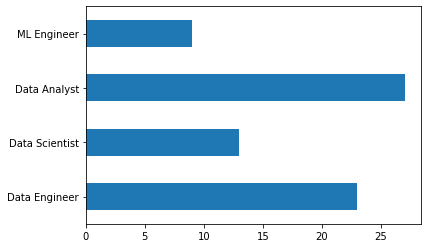

In [123]:
architect_positions.sum().plot(kind='barh')

From what we have as data, we can say that architects are grouped mostly as Data Analysts, so does the description usually say, so we can designate all unknown architects as data analysts

In [124]:
relevant_data["Data Analyst"] = relevant_data["Data Analyst"].mask(relevant_data["Job Title"].str.contains(regex_architects), other= True)

In [125]:
relevant_data[relevant_data["Job Title"].str.contains(regex_architects)]

,Job Title,Job Description,Data Engineer,Data Analyst,ML Engineer,Data Scientist,Position,Salary Min,Salary Max,Salary Average,Experience by description,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue
1500,Business Solution Architect,Description Do you want your voice heard and your actions to count? Discover your opportunity wi...,False,True,False,False,Mid,74.0,123.0,98.5,8.0,"Tempe, AZ","Tokyo, Japan",10000+ employees,1864,Company - Public,Banks & Credit Unions,Finance,$10+ billion (USD)
1877,Automation and Warehousing Business Analyst/Solution Architect,"Title: Automation and Warehousing Business Analyst/Solution Architect Location: Philadelphia, PA...",False,True,False,False,Junior,38.0,58.0,48.0,NaN,"Philadelphia, PA","Princeton, NJ",501 to 1000 employees,2002,Company - Private,IT Services,Information Technology,$100 to $500 million (USD)
2174,Business Architect,Excellent analytical skills and experience in Banking and Marketing. Experience with Pega Case M...,False,True,False,False,Junior,48.0,74.0,61.0,NaN,"San Antonio, TX","South Plainfield, NJ",51 to 200 employees,1999,Company - Private,Staffing & Outsourcing,Business Services,$50 to $100 million (USD)
2456,Business Intelligence (BI) Analyst/Architect,Company OverviewTeledyne Technologies Incorporated provides enabling technologies for industrial...,False,True,False,False,Mid,81.0,97.0,89.0,10.0,"San Diego, CA","Thousand Oaks, CA",5001 to 10000 employees,1999,Company - Public,Transportation Equipment Manufacturing,Manufacturing,$2 to $5 billion (USD)
2540,Senior Business Systems Analyst (Solution Architect & Administrator) - Salesforce Sales Cloud & ...,Senior Business Systems Analyst (Solution Architect Administrator) - Salesforce Sales Cloud Aptt...,False,True,False,False,Senior,73.0,112.0,92.5,10.0,"San Diego, CA","Brea, CA",51 to 200 employees,2019,Company - Private,IT Services,Information Technology,Unknown / Non-Applicable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15866,Data Architect II,"Data Architect IILocation: Jacksonville, FLDuration: 3 monthsDescription:Bachelors Degree Prefer...",False,True,False,False,Mid,54.0,88.0,71.0,3.0,"Jacksonville, FL","Troy, MI",1001 to 5000 employees,2000,Company - Private,Staffing & Outsourcing,Business Services,$100 to $500 million (USD)
15881,Big Data Solution Architect Consultant,The Company ACTS has been a high-tech business partner and innovator for nearly two decades. Our...,False,True,False,False,Mid,66.0,130.0,98.0,4.4,"Jacksonville, FL","Fort Washington, PA",5001 to 10000 employees,1971,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD)
15973,Sr. Data Architect (contract-to-hire),Join this growing company in the Financial Services industry. You will have responsibility for t...,False,True,False,False,Senior,100.0,172.0,136.0,5.0,"Irving, TX",-1,Unknown,Unknown,-1,-1,-1,Unknown / Non-Applicable
16006,"Data Scientist, Analytics Architecture",Immuta was founded in 2015 based on a specific mission to build a platform that accelerates self...,False,True,False,True,Junior,100.0,163.0,131.5,NaN,"Columbus, OH","College Park, MD",51 to 200 employees,2015,Company - Private,Computer Hardware & Software,Information Technology,Unknown / Non-Applicable


In [126]:
all_architects = relevant_data[relevant_data["Job Title"].str.contains(regex_architects)]

In [127]:
architect_positions = all_architects.filter(["Data Engineer", "Data Scientist", "Data Analyst", "ML Engineer"], axis=1)

<AxesSubplot:>

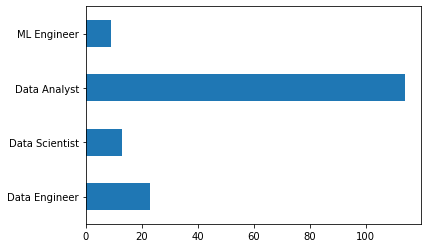

In [128]:
architect_positions.sum().plot(kind='barh')

Ok, now lets see what else we should assign

In [129]:
no_job_category = relevant_data[(relevant_data["Data Analyst"] == False) & (relevant_data["Data Scientist"] == False) & (relevant_data["Data Engineer"] == False) & (relevant_data["ML Engineer"] == False)]
no_job_category

,Job Title,Job Description,Data Engineer,Data Analyst,ML Engineer,Data Scientist,Position,Salary Min,Salary Max,Salary Average,Experience by description,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue
63,TGS Central Teams Business Partner - Supply Chain Planning Lead,Job Description Summary The role of the Supply Chain Planning Business Partner lead is to serve ...,False,False,False,False,Junior,81.0,159.0,120.0,NaN,"Franklin Lakes, NJ","Franklin Lakes, NJ",10000+ employees,1897,Company - Public,Health Care Products Manufacturing,Manufacturing,$10+ billion (USD)
260,Business Development (Institutional Investors),"As a business development executive at Second Measure, you'll work with some of the world's larg...",False,False,False,False,Junior,51.0,95.0,73.0,NaN,"New York, NY","San Mateo, CA",51 to 200 employees,2015,Company - Private,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable
325,Business Manager (Must speak Chinese / Mandarin),Role and Responsibility Responsible for developing and costing retail ready product for Allied H...,False,False,False,False,Senior,80.0,90.0,85.0,4.000000,"Commerce, CA","Detroit, MI",1 to 50 employees,2008,Company - Public,-1,-1,Less than $1 million (USD)
331,Business Manager,Johnsonville products are available in retail stores in all 50 states. As a member of this sales...,False,False,False,False,Senior,80.0,90.0,85.0,NaN,"Los Angeles, CA","Sheboygan Falls, WI",1001 to 5000 employees,1945,Company - Private,Food & Beverage Manufacturing,Manufacturing,$1 to $2 billion (USD)
333,Business Manager,We are a new laser tag in West Covina! We have 11 other locations in Russia with a 4.7 rating fr...,False,False,False,False,Senior,80.0,90.0,85.0,NaN,"West Covina, CA","West Covina, CA",Unknown,Unknown,Unknown,-1,-1,Unknown / Non-Applicable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15755,Staff Software Engineer - Back End (Java - Data Focused),"As the worlds number 1 job site, our mission is to help people get jobs. We need talented, passi...",False,False,False,False,Senior,50.0,110.0,80.0,5.000000,"Austin, TX","Austin, TX",10000+ employees,2004,Company - Private,Internet,Information Technology,$2 to $5 billion (USD)
15788,Staff Data Custodian - Onshore,About GLOBALFOUNDRIES GLOBALFOUNDRIES is the world's first full-service semiconductor foundry wi...,False,False,False,False,Senior,62.0,112.0,87.0,5.000000,"Austin, TX","Santa Clara, CA",10000+ employees,2009,Company - Private,Electrical & Electronic Manufacturing,Manufacturing,$2 to $5 billion (USD)
15809,Master Data Management (MDM) - Deloitte - (Remote/Contract/Freelance),"Experfy*, a Harvard-incubated on-demand talent platform, is working with Deloitte to build an in...",False,False,False,False,Mid,114.0,185.0,149.5,4.307692,"Austin, TX","Boston, MA",1 to 50 employees,Unknown,Company - Private,-1,-1,Unknown / Non-Applicable
15956,Sr. Big data Ebgineer,"Role : -Big Data Engineer/Tech Lead Job type:-Fulltime Job Location:-Irving, TX Job Description ...",False,False,False,False,Senior,100.0,172.0,136.0,8.000000,"Irving, TX","Princeton, NJ",501 to 1000 employees,2002,Company - Private,IT Services,Information Technology,$100 to $500 million (USD)


In [130]:
# no_job_category["Job Title"].value_counts().to_dict()
no_job_category["Job Title"].value_counts()

Software Engineer                             93
Data Warehouse Engineer                       14
Systems Engineer                              13
Data Platform Engineer                        13
Business Intelligence Engineer                10
                                              ..
Mid Level SSDS Integration & Test Engineer     1
Associate Software Engineer                    1
Cleaning Validation Engineer                   1
Building Controls Engineer                     1
JPSC-6511 - Big Data Consultant                1
Name: Job Title, Length: 974, dtype: int64

From this data we can see there are a lot of "Data *something* Engineer", some "Data" *something* and a lot other which are various software engineers. I guess the latter we can skip or just add them to "Other Software engineers"

In [131]:
len(relevant_data[relevant_data["Data Engineer"] == True])

2001

In [132]:
regex_data_something_engineer = "(?i)data.* (?i).*engineer|(?i)engineer.* (?i).*data|(?i)intelligence (?i)engineer"
no_job_category["Data Engineer"] = no_job_category["Data Engineer"].mask(no_job_category["Job Title"].str.contains(regex_data_something_engineer), other = True)
relevant_data["Data Engineer"].update(no_job_category["Data Engineer"])

C:\Users\ebasii\AppData\Local\Temp\ipykernel_13452\3251419092.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_job_category["Data Engineer"] = no_job_category["Data Engineer"].mask(no_job_category["Job Title"].str.contains(regex_data_something_engineer), other = True)


In [133]:
len(relevant_data[relevant_data["Data Engineer"] == True])

2265

In [134]:
no_job_category = relevant_data[
    (relevant_data["Data Analyst"] == False) & 
    (relevant_data["Data Scientist"] == False) & 
    (relevant_data["Data Engineer"] == False) & 
    (relevant_data["ML Engineer"] == False)
]
no_job_category

,Job Title,Job Description,Data Engineer,Data Analyst,ML Engineer,Data Scientist,Position,Salary Min,Salary Max,Salary Average,Experience by description,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue
63,TGS Central Teams Business Partner - Supply Chain Planning Lead,Job Description Summary The role of the Supply Chain Planning Business Partner lead is to serve ...,False,False,False,False,Junior,81.0,159.0,120.0,NaN,"Franklin Lakes, NJ","Franklin Lakes, NJ",10000+ employees,1897,Company - Public,Health Care Products Manufacturing,Manufacturing,$10+ billion (USD)
260,Business Development (Institutional Investors),"As a business development executive at Second Measure, you'll work with some of the world's larg...",False,False,False,False,Junior,51.0,95.0,73.0,NaN,"New York, NY","San Mateo, CA",51 to 200 employees,2015,Company - Private,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable
325,Business Manager (Must speak Chinese / Mandarin),Role and Responsibility Responsible for developing and costing retail ready product for Allied H...,False,False,False,False,Senior,80.0,90.0,85.0,4.000000,"Commerce, CA","Detroit, MI",1 to 50 employees,2008,Company - Public,-1,-1,Less than $1 million (USD)
331,Business Manager,Johnsonville products are available in retail stores in all 50 states. As a member of this sales...,False,False,False,False,Senior,80.0,90.0,85.0,NaN,"Los Angeles, CA","Sheboygan Falls, WI",1001 to 5000 employees,1945,Company - Private,Food & Beverage Manufacturing,Manufacturing,$1 to $2 billion (USD)
333,Business Manager,We are a new laser tag in West Covina! We have 11 other locations in Russia with a 4.7 rating fr...,False,False,False,False,Senior,80.0,90.0,85.0,NaN,"West Covina, CA","West Covina, CA",Unknown,Unknown,Unknown,-1,-1,Unknown / Non-Applicable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15726,"Clinical Data (Data Entry) Operator I Swing Shift, Tuesday-Saturday",POSITION SUMMARY Natera is currently seeking a Clinical Data (Data Entry) Operator for swing shi...,False,False,False,False,Mid,70.0,129.0,99.5,0.500000,"Austin, TX","San Carlos, CA",501 to 1000 employees,2004,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$100 to $500 million (USD)
15788,Staff Data Custodian - Onshore,About GLOBALFOUNDRIES GLOBALFOUNDRIES is the world's first full-service semiconductor foundry wi...,False,False,False,False,Senior,62.0,112.0,87.0,5.000000,"Austin, TX","Santa Clara, CA",10000+ employees,2009,Company - Private,Electrical & Electronic Manufacturing,Manufacturing,$2 to $5 billion (USD)
15809,Master Data Management (MDM) - Deloitte - (Remote/Contract/Freelance),"Experfy*, a Harvard-incubated on-demand talent platform, is working with Deloitte to build an in...",False,False,False,False,Mid,114.0,185.0,149.5,4.307692,"Austin, TX","Boston, MA",1 to 50 employees,Unknown,Company - Private,-1,-1,Unknown / Non-Applicable
15956,Sr. Big data Ebgineer,"Role : -Big Data Engineer/Tech Lead Job type:-Fulltime Job Location:-Irving, TX Job Description ...",False,False,False,False,Senior,100.0,172.0,136.0,8.000000,"Irving, TX","Princeton, NJ",501 to 1000 employees,2002,Company - Private,IT Services,Information Technology,$100 to $500 million (USD)


In [135]:
# no_job_category["Job Title"].value_counts().to_dict()
no_job_category["Job Title"].value_counts()

Software Engineer                             93
Systems Engineer                              13
Quantitative Researcher                       10
Senior Software Engineer                       9
Cloud Engineer                                 9
                                              ..
Sr. DDI Migration Engineer                     1
Senior Project Controls Engineer               1
Systems Engineer - Mid Level                   1
Mid Level SSDS Integration & Test Engineer     1
JPSC-6511 - Big Data Consultant                1
Name: Job Title, Length: 807, dtype: int64

In [136]:
relevant_data.insert(column="Other Software Engineers", value=False , loc=6)

In [137]:
no_job_category.insert(column="Other Software Engineers", value=True , loc=6)

In [138]:
relevant_data["Other Software Engineers"].update(no_job_category["Other Software Engineers"])

In [139]:
relevant_data.columns.to_list() # Copy/Paste columns :)

['Job Title',
 'Job Description',
 'Data Engineer',
 'Data Analyst',
 'ML Engineer',
 'Data Scientist',
 'Other Software Engineers',
 'Position',
 'Salary Min',
 'Salary Max',
 'Salary Average',
 'Experience by description',
 'Location',
 'Headquarters',
 'Size',
 'Founded',
 'Type of ownership',
 'Industry',
 'Sector',
 'Revenue']

In [140]:
positions_by_type = relevant_data[[
    'Data Engineer',
    'Data Analyst',
    'ML Engineer',
    'Data Scientist',
    'Other Software Engineers'
]].sum()

<AxesSubplot:>

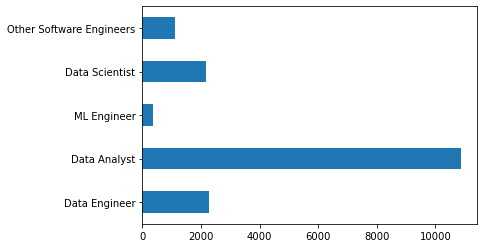

In [141]:
positions_by_type.plot(kind='barh')